# 3. Fitting diads once you have groups
- Once you have divided your diads into groups based on strengths, you need to tweak the fit parameters for each group
- Then you can loop through all files in a given group and automatically fit the spectra

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'1.0.2'

## Specifying filetype, and folder as before

In [32]:
# This specifies what file type your Raman exported in. 
meta_path, spectra_path, spectra_filetype, prefix, str_prefix, spectra_file_ext, meta_file_ext, TruPower=pf.get_settings()

## Load in data and fit parameters
- This loads in the dataframes of the fit parameters you saved in the other file, by group
- At this point you select what group you want to fit (batch = 'Weak', 'Medium' or 'Strong'). After running through the entire notebook for one group, come back up here to fit a second group.

In [33]:
## load dataframes and numpy arrays 
np_x = joblib.load('np_x.sav')

# Select the group you want to fit ('Weak', 'Medium', 'Strong'). After selecting one, go through and select another one and run again from here. 
batch='Std' # Options are Weak, Medium, Strong

if batch=='Weak':
    GroupN_df=joblib.load('Weak_df.sav')
if batch=='Medium':
    GroupN_df=joblib.load('Medium_df.sav')
if batch=='Strong':
    GroupN_df=joblib.load('Strong_df.sav')
if batch=='Std':
    GroupN_df=joblib.load('Std_df.sav')

GroupN_df

filename  rays_present  approx_split    Diad1_pos  \
0   06 FG04-A1-4-start-50X-r1.txt           0.0    104.559105  1283.184424   
1   07 FG04-A1-4-start-50X-r2.txt           0.0    104.559105  1283.167926   
2   08 FG04-A1-4-start-50X-r3.txt           0.0    104.559105  1283.178924   
3  09 FG04-A1-4-start-100X-r1.txt           0.0    104.570104  1283.167926   
4  10 FG04-A1-4-start-100X-r2.txt           0.0    104.537108  1283.206421   
5  11 FG04-A1-4-start-100X-r3.txt           0.0    104.553606  1283.195422   
6          12 FG04-A1-1-start.txt           0.0    104.377627  1283.514384   
7     13 FG04-A1-1-start-100X.txt           0.0    104.344631  1283.547381   
8         58 FG04-A1-4-end-r4.txt           0.0    104.622031  1283.179589   

     Diad2_pos      HB1_pos      HB2_pos      C13_pos  Diad1_abs_prom  \
0  1387.743529          NaN  1408.608056          NaN      478.560137   
1  1387.727031  1263.078807  1409.680429  1370.063125      939.237707   
2  1387.738030  1262.941323  1409.207485  1370.189610      980.023113   
3  1387.738030          NaN          NaN          NaN      313.433199   
4  1387.743529          NaN          NaN          NaN      332.499861   
5  1387.749028          NaN          NaN          NaN      327.099904   
6  1387.892011  1263.766225  1409.322971          NaN      749.916465   
7  1387.892011          NaN  1409.350468          NaN      418.475515   
8  1387.801620          NaN          NaN          NaN      266.637158   

   Diad2_abs_prom  ...  HB2_height  C13_height  Diad1_height  HB1_height  \
0      977.971627  ...  760.508938         NaN   1196.660144         NaN   
1     1891.837437  ...  763.952579  725.488357   1624.387716  732.786004   
2     2020.000786  ...  764.776441  725.334229   1661.823101  728.467415   
3      642.767987  ...         NaN         NaN    979.783220         NaN   
4      671.405092  ...         NaN         NaN    999.299849         NaN   
5      664.312060  ...         NaN         NaN    994.749913         NaN   
6     1543.784283  ...  767.247692         NaN   1437.866462  728.135310   
7      885.537897  ...  708.540734         NaN   1086.525518         NaN   
8      544.085141  ...         NaN         NaN    949.637158         NaN   

   Diad1_Median_Bck  Diad2_Median_Bck  C13_HB2_abs_prom_ratio  \
0        718.100006        716.299988                     NaN   
1        685.150009        684.150009                2.909253   
2        681.799988        680.849991                2.855984   
3        666.350021        666.050003                     NaN   
4        666.799988        666.399994                     NaN   
5        667.650009        666.750015                     NaN   
6        687.949997        687.550003                     NaN   
7        668.050003        668.150009                     NaN   
8        683.000000        682.149994                     NaN   

   Diad2_HB2_Valley_prom  HB1_prom/std_betweendiads  HB2_prom/std_betweendiads  
0               1.007104                        NaN                  17.755266  
1               1.022079                  28.461940                  47.122938  
2               1.021714                  27.089816                  47.971986  
3                    NaN                        NaN                        NaN  
4                    NaN                        NaN                        NaN  
5                    NaN                        NaN                        NaN  
6               1.016412                  26.736483                  51.590541  
7               1.010337                        NaN                  29.269992  
8                    NaN                        NaN                        NaN  

[9 rows x 40 columns]

### Now load one file from this group to tweak parameters for

In [34]:
Diad_Files =GroupN_df['filename']
i=0


### Lets plot the diad to have a look at it

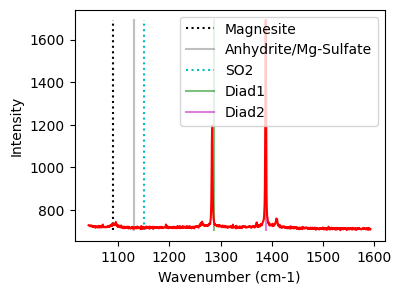

In [35]:
plot1=pf.plot_diad(path=spectra_path, filename=Diad_Files[i], filetype=spectra_filetype)

## Now lets inspect the diads and get their approximate positions
- As with generic peak, you can exclude 2 segments (e.g. around cosmic rays)
- You then specify how many peaks you want to fit on each diad. 1 means just the strong peak, 2 hotbands, and 3 for Diad2 would also fit the C13 peak if present. 
- The identify_diad_peaks then uses scipy findpeaks to identify the positions of the 2 diads, and any other peaks the user asks for. These are saved, and fed into the later functions for peak fitting. 

## Choose a model for fitting all peaks
- Option of Voigt or PseudoVoigt. We recomend PsuedoVoigt

In [36]:
model_name='PseudoVoigtModel'

## Fit Diad 1
- Tweak the parameters in the config files for each group. E.g. how many peaks (fit_peaks), the background positions, the sigma of the diad, and whether or not you want a gaussian background

In [37]:
diad_id_config=pf.diad_id_config(height=50, exclude_range1=[1308, 1309])
diad_id_config

# FG04 Standards
if batch=='Std':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1240),
    upper_bck_diad1=(1315, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init


if batch=='Weak':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1250),
    upper_bck_diad1=(1300, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init

if batch=='Medium':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1240),
    upper_bck_diad1=(1315, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init

if batch=='Strong':
    diad1_fit_config_init=pf.diad1_fit_config(
    fit_gauss=True, gauss_amp= 2*GroupN_df['HB1_abs_prom'].iloc[i],
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1220),
    upper_bck_diad1=(1330, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=1000, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
diad1_fit_config_init

diad1_fit_config(model_name='PseudoVoigtModel', fit_peaks=2, N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1240), upper_bck_diad1=(1315, 1350), fit_gauss=False, gauss_amp=1000, diad_sigma=0.6, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, diad_prom=478.5601374799571, HB_prom=nan, x_range_baseline=30, y_range_baseline=100, dpi=200, x_range_residual=10, return_other_params=False)

### See what these fit parameters look like for diad1

/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)


Diad1_Combofit_Cent  Diad1_Voigt_Cent  Diad1_cent_err  Diad1_Voigt_Area  \
0          1283.180918       1283.180918        0.007877       1411.598827   

   Diad1_Voigt_Sigma  Diad1_Voigt_Gamma  Diad1_Combofit_Height  \
0           1.019119                  0             482.962278   

   Diad1_Residual  Diad1_Prop_Lor  Diad1_fwhm        Diad1_refit  \
0        4.214528        0.799417    2.038238  Flagged Warnings:   

   Diad1_Asym50  Diad1_Asym70  Diad1_Yuan2017_sym_factor  \
0      1.008306      1.026995                   0.016929   

   Diad1_Remigi2021_BSF   Diad1_PDF_Model  
0               0.00422  PseudoVoigtModel

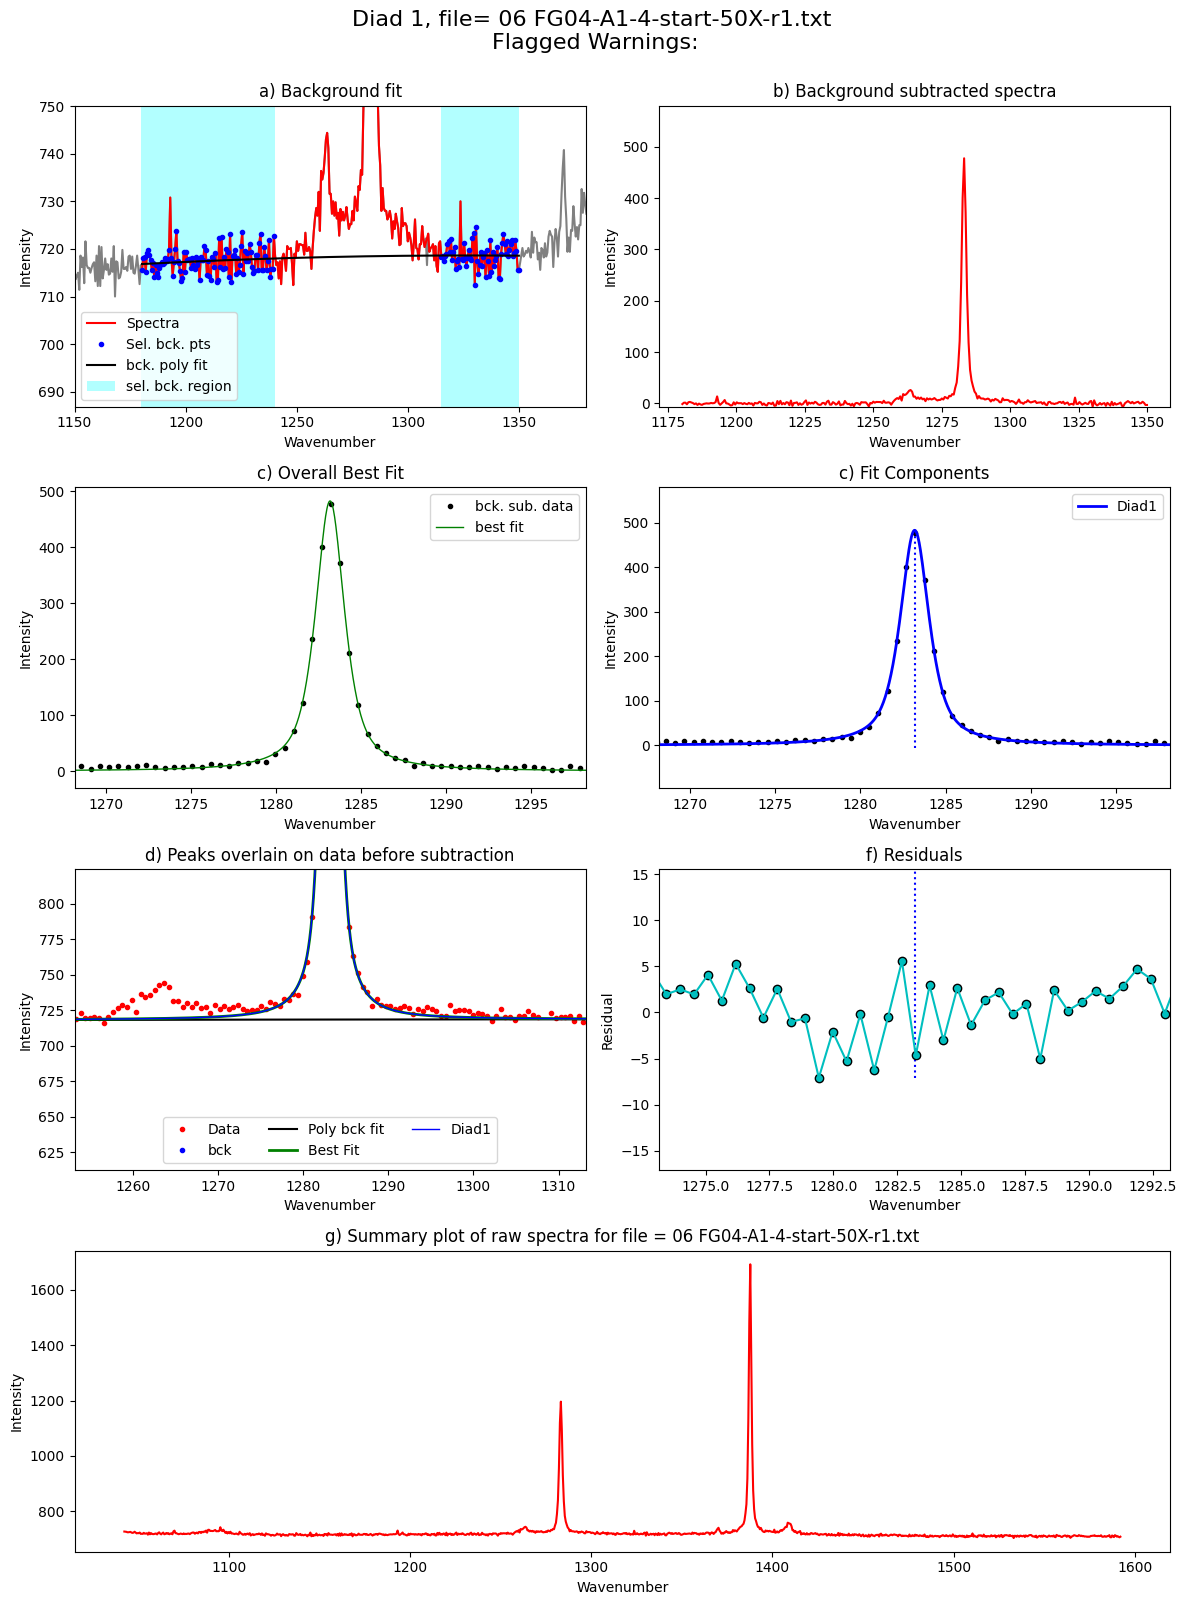

In [38]:
Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config_init,
config2=diad_id_config,
path=spectra_path, filename=Diad_Files.iloc[0],
filetype=spectra_filetype, plot_figure=True, close_figure=False,
Diad_pos=GroupN_df['Diad1_pos'].iloc[i],
HB_pos=GroupN_df['HB1_pos'].iloc[i])
Diad1_fit

### Update the sigma
- The sigma parameter varies quite a lot based on the splitting. Best to update your first guess with what you found for the example file above

In [39]:
diad1_fit_config2=diad1_fit_config_init

## Fit diad2

In [40]:
if batch=='Std':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=True, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1350), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init


if batch=='Weak':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=2, upper_bck_diad2=(1430, 1480),
    lower_bck_diad2=(1310, 1360), diad_sigma=0.4,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i])
    diad2_fit_config_init

if batch=='Medium':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=False, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1350), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init

if batch=='Strong':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=True, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1340), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=1000,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init
diad2_fit_config_init

diad2_fit_config(model_name='PseudoVoigtModel', fit_peaks=3, N_poly_bck_diad2=2, lower_bck_diad2=(1310, 1350), upper_bck_diad2=(1440, 1470), fit_gauss=True, gauss_amp=93.41790026679564, diad_sigma=1, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, diad_prom=977.9716271624795, HB_prom=46.70895013339782, C13_prom=nan, x_range_baseline=30, y_range_baseline=100, plot_figure=True, dpi=200, x_range_residual=30, return_other_params=False)

### See what these fit parameters look like for diad2

/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)


Diad2_Combofit_Cent  Diad2_Voigt_Cent  Diad2_cent_err  Diad2_Voigt_Area  \
0          1387.711543       1387.711593        0.002405       2310.896919   

   Diad2_Voigt_Sigma  Diad2_Voigt_Gamma     HB2_Cent    HB2_Area  HB2_Sigma  \
0           0.847571                  0  1409.018788  241.632475   1.988773   

   Diad2_Combofit_Height  ...  Diad2_fwhm  Diad2_Gauss_Cent  Diad2_Gauss_Area  \
0             977.697628  ...    1.695142       1385.793161         306.21609   

   Diad2_Gauss_Sigma        Diad2_refit  Diad2_Asym50 Diad2_Asym70  \
0          18.532603  Flagged Warnings:      1.095041     1.084892   

   Diad2_Yuan2017_sym_factor  Diad2_Remigi2021_BSF   Diad2_PDF_Model  
0                   0.161108              0.001734  PseudoVoigtModel  

[1 rows x 22 columns]

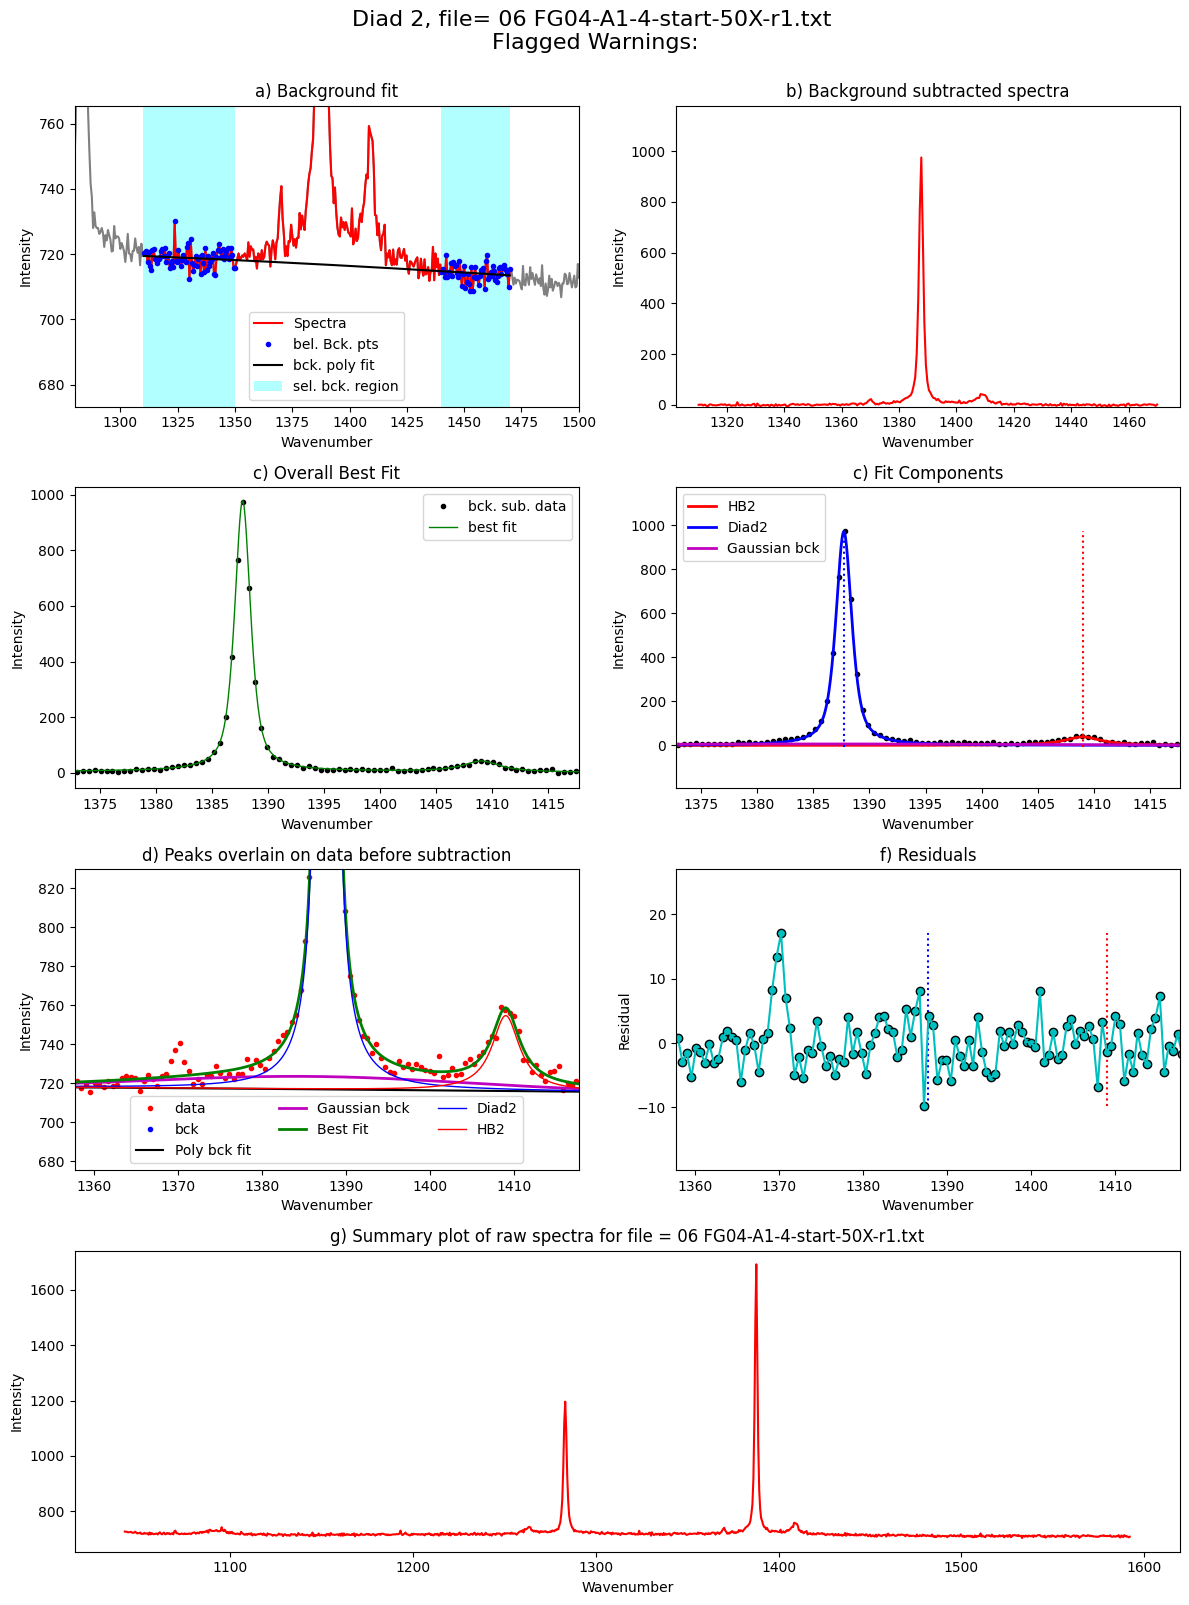

In [41]:
Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config_init,
    config2=diad_id_config,
path=spectra_path, filename=Diad_Files[i], filetype=spectra_filetype,
plot_figure=True, close_figure=False, 
Diad_pos=GroupN_df['Diad2_pos'].iloc[i],
HB_pos=GroupN_df['HB2_pos'].iloc[i], 
C13_pos=GroupN_df['C13_pos'].iloc[i])
Diad2_fit.to_clipboard(excel=True)
Diad2_fit

## Loop over all the files in the group
- This will loop over all the 

  0%|          | 0/9 [00:00<?, ?it/s]/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)


Processing file: 06 FG04-A1-4-start-50X-r1.txt


/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)
 11%|█         | 1/9 [00:01<00:10,  1.34s/it]

Processing file: 07 FG04-A1-4-start-50X-r2.txt


/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)
/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)
 22%|██▏       | 2/9 [00:03<00:11,  1.70s/it]

Processing file: 08 FG04-A1-4-start-50X-r3.txt


/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)
/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)
 33%|███▎      | 3/9 [00:05<00:12,  2.15s/it]/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead.

Processing file: 09 FG04-A1-4-start-100X-r1.txt


/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)
 44%|████▍     | 4/9 [00:07<00:08,  1.78s/it]/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)


Processing file: 10 FG04-A1-4-start-100X-r2.txt


/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)
 56%|█████▌    | 5/9 [00:08<00:06,  1.60s/it]/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)


Processing file: 11 FG04-A1-4-start-100X-r3.txt


/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)
 67%|██████▋   | 6/9 [00:09<00:04,  1.48s/it]/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)


Processing file: 12 FG04-A1-1-start.txt


/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)
 78%|███████▊  | 7/9 [00:11<00:02,  1.48s/it]/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)


Processing file: 13 FG04-A1-1-start-100X.txt


/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)
 89%|████████▉ | 8/9 [00:12<00:01,  1.43s/it]/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)


Processing file: 58 FG04-A1-4-end-r4.txt


/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)
100%|██████████| 9/9 [00:13<00:00,  1.53s/it]


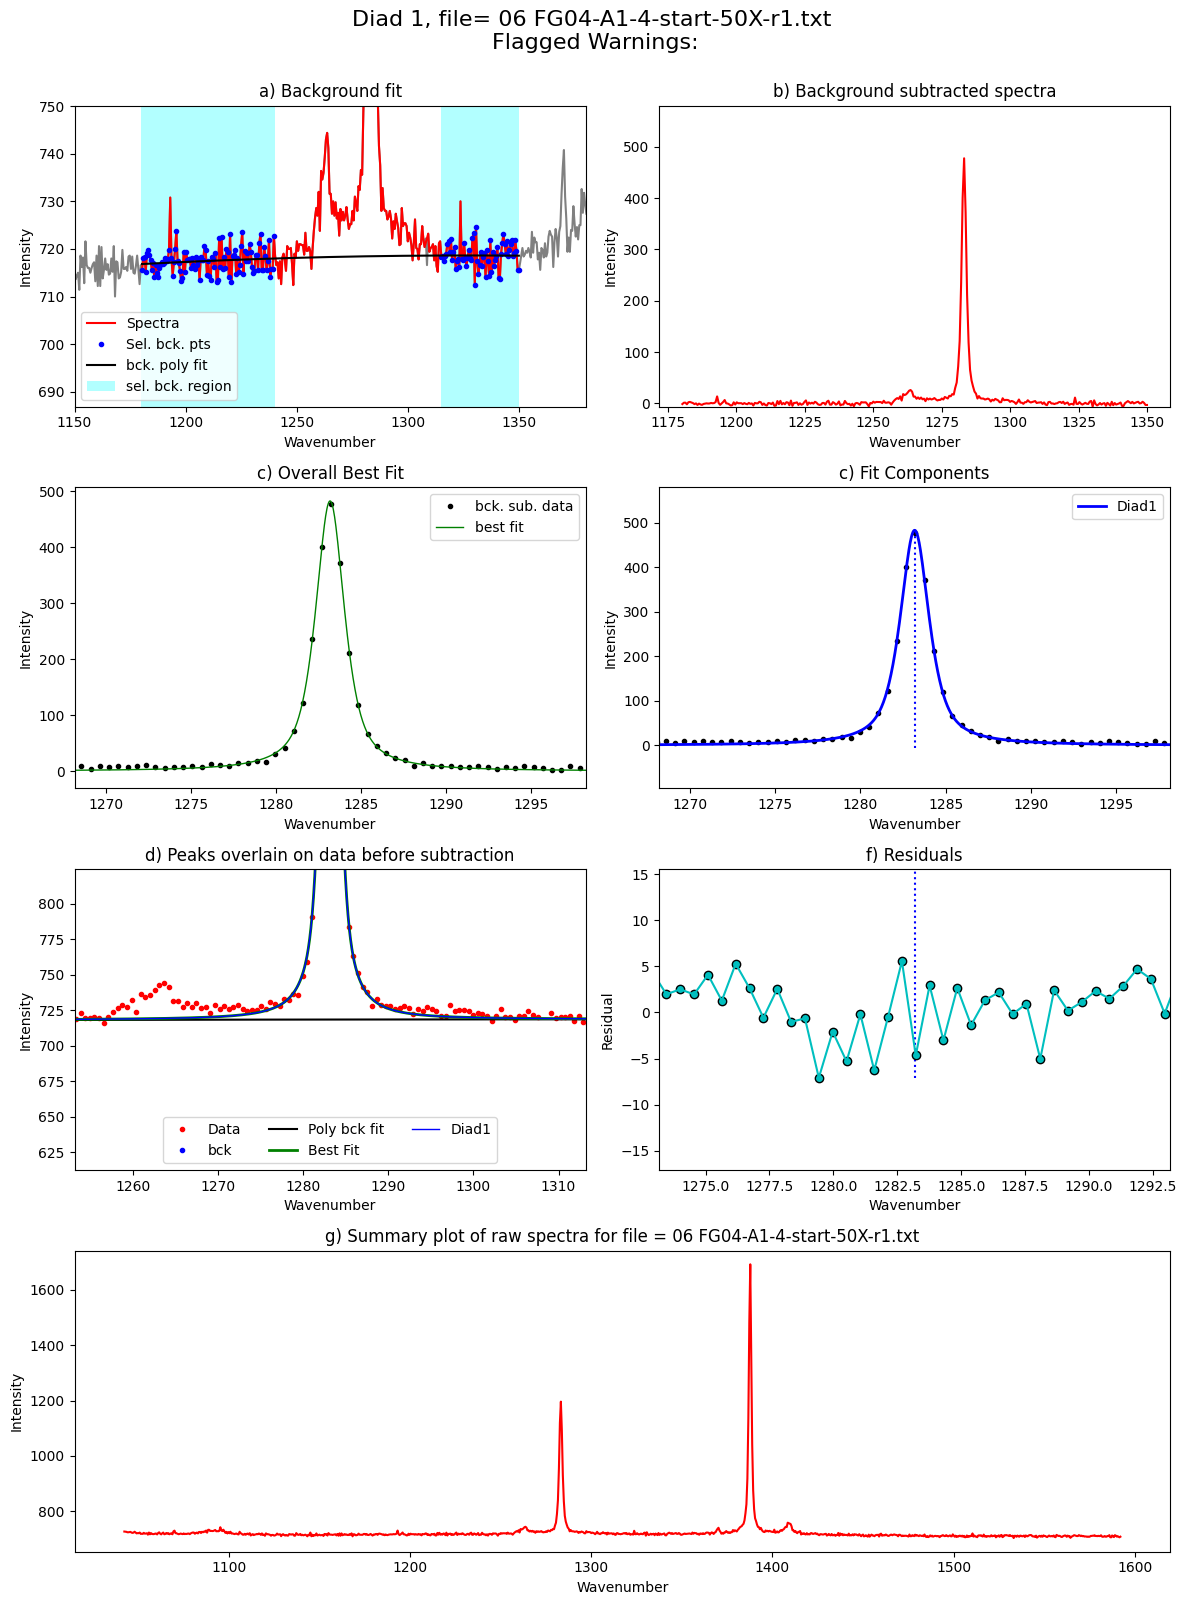

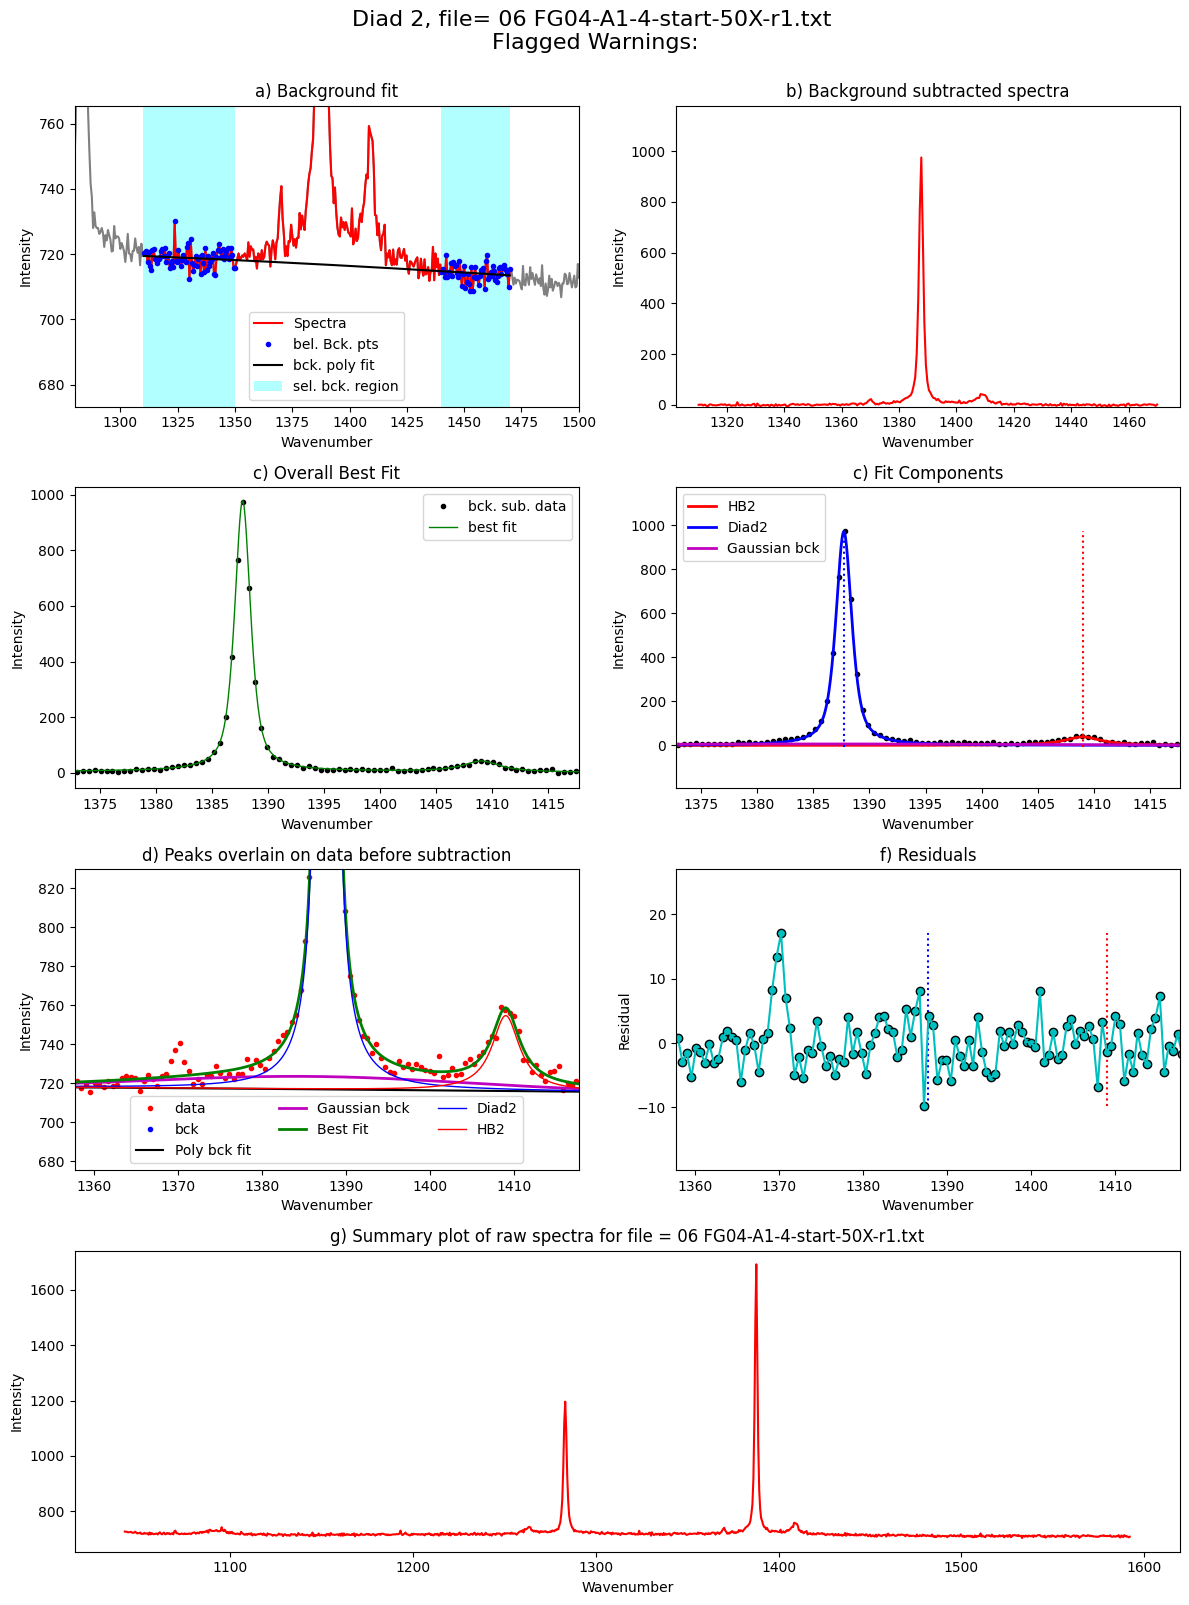

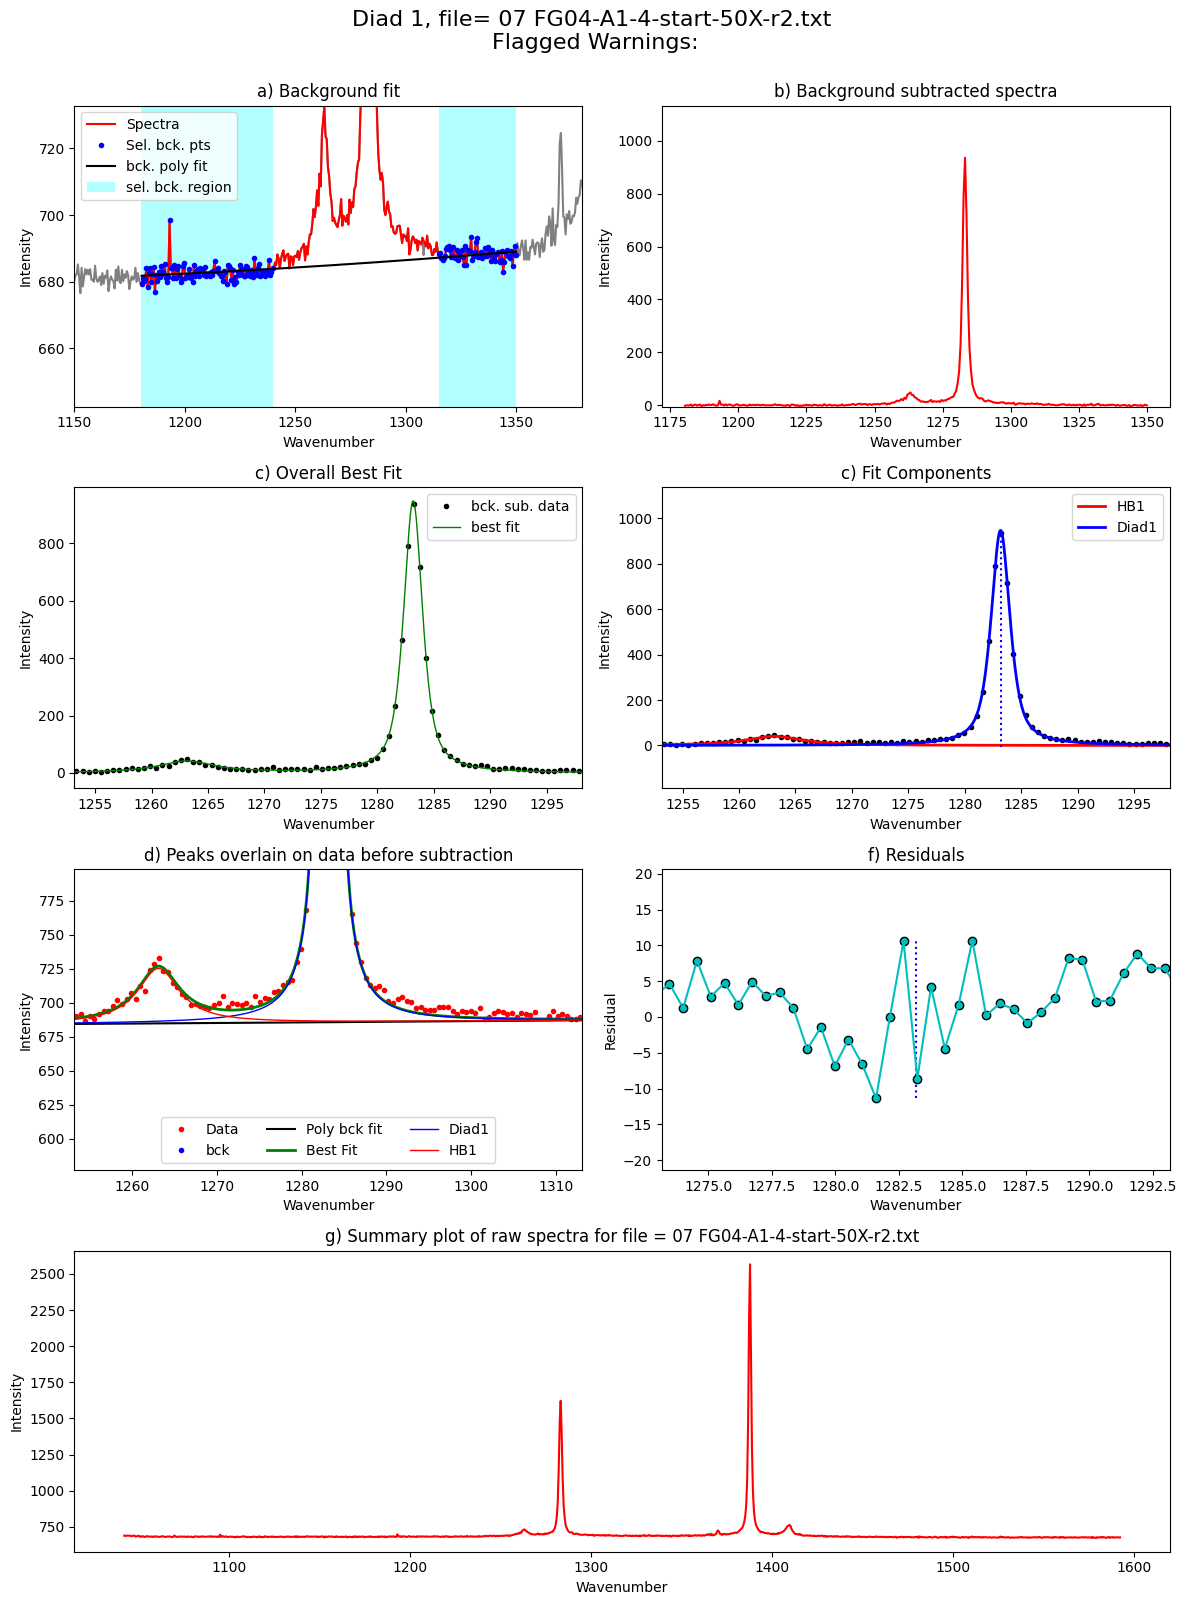

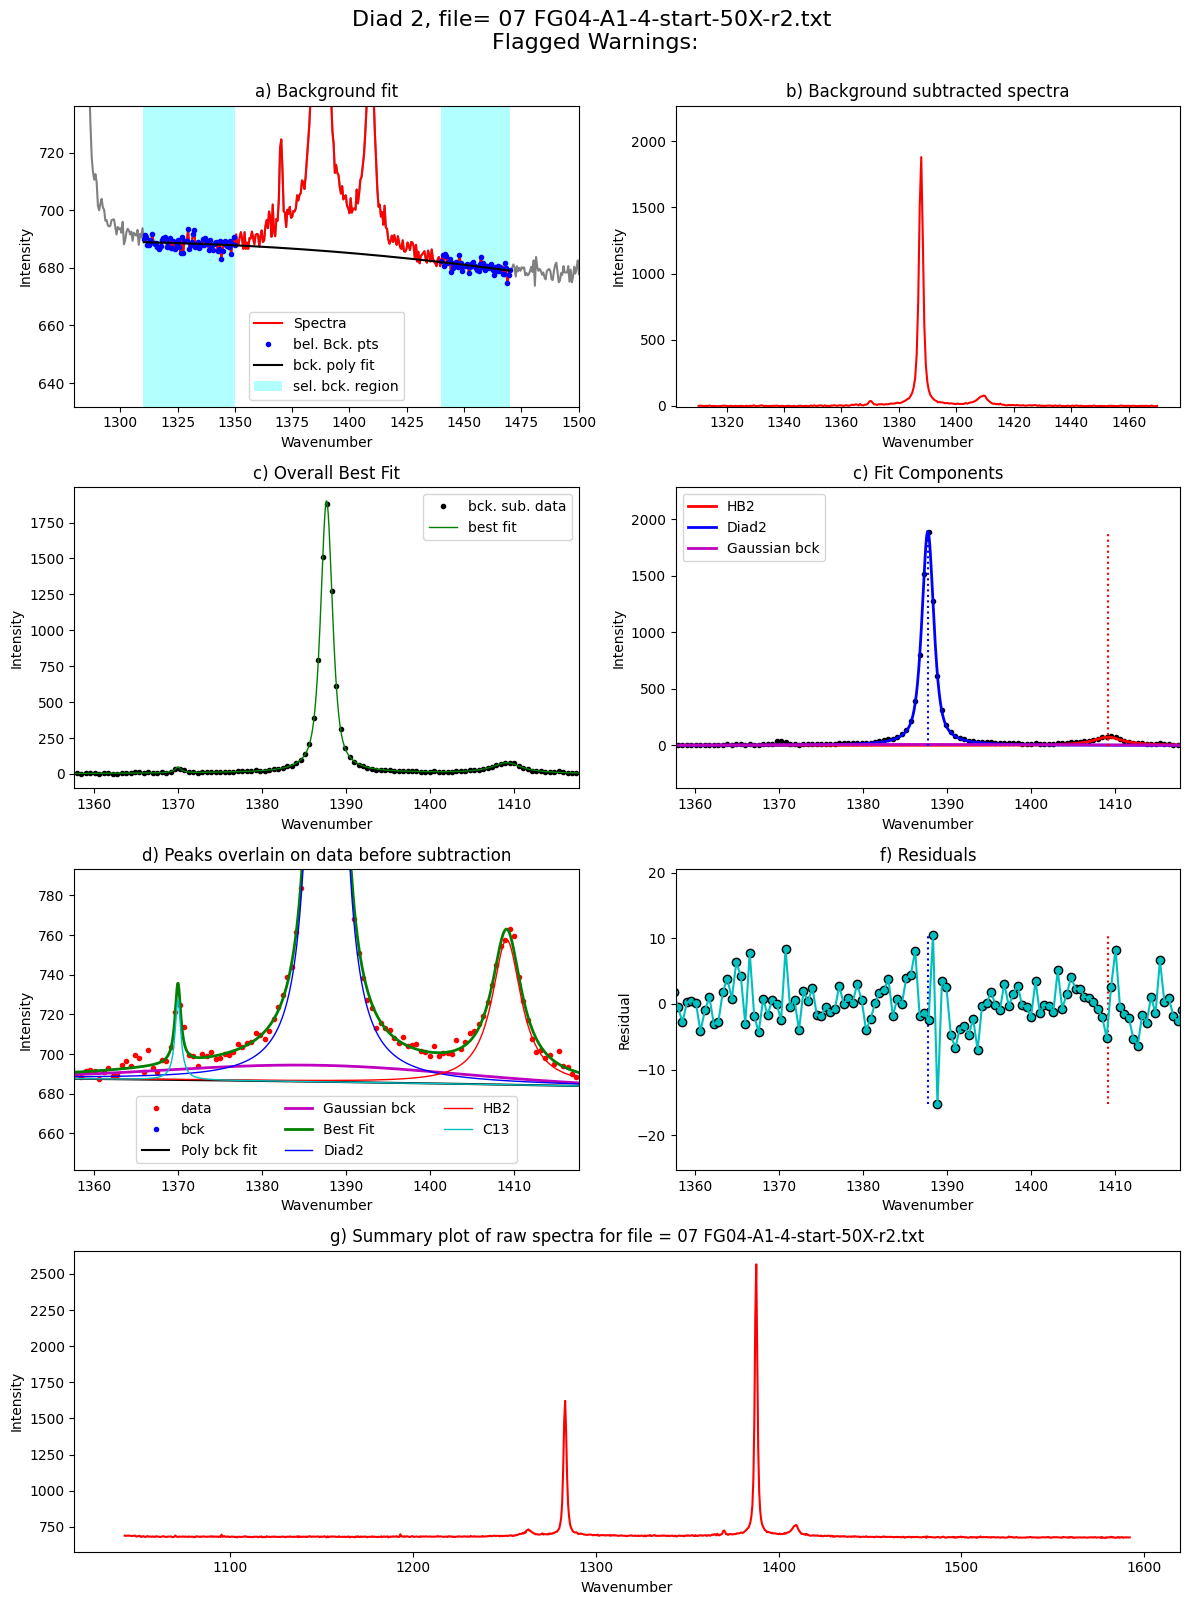

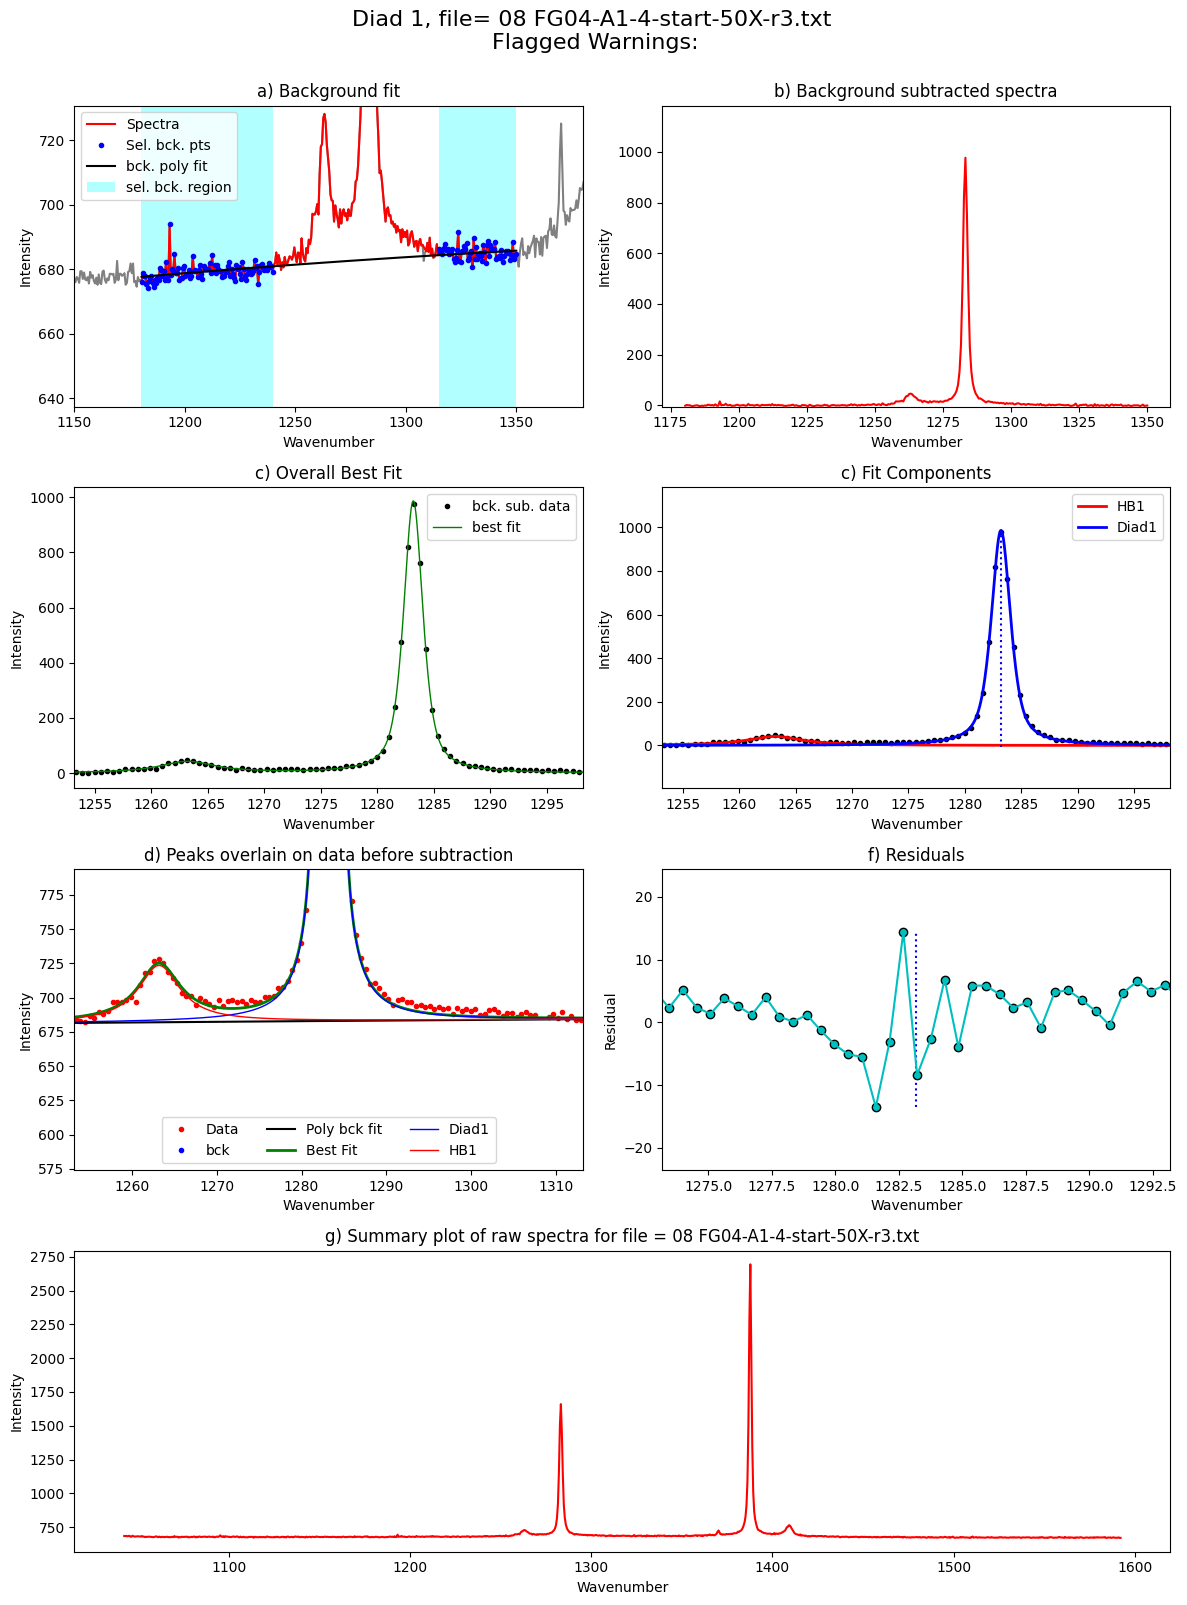

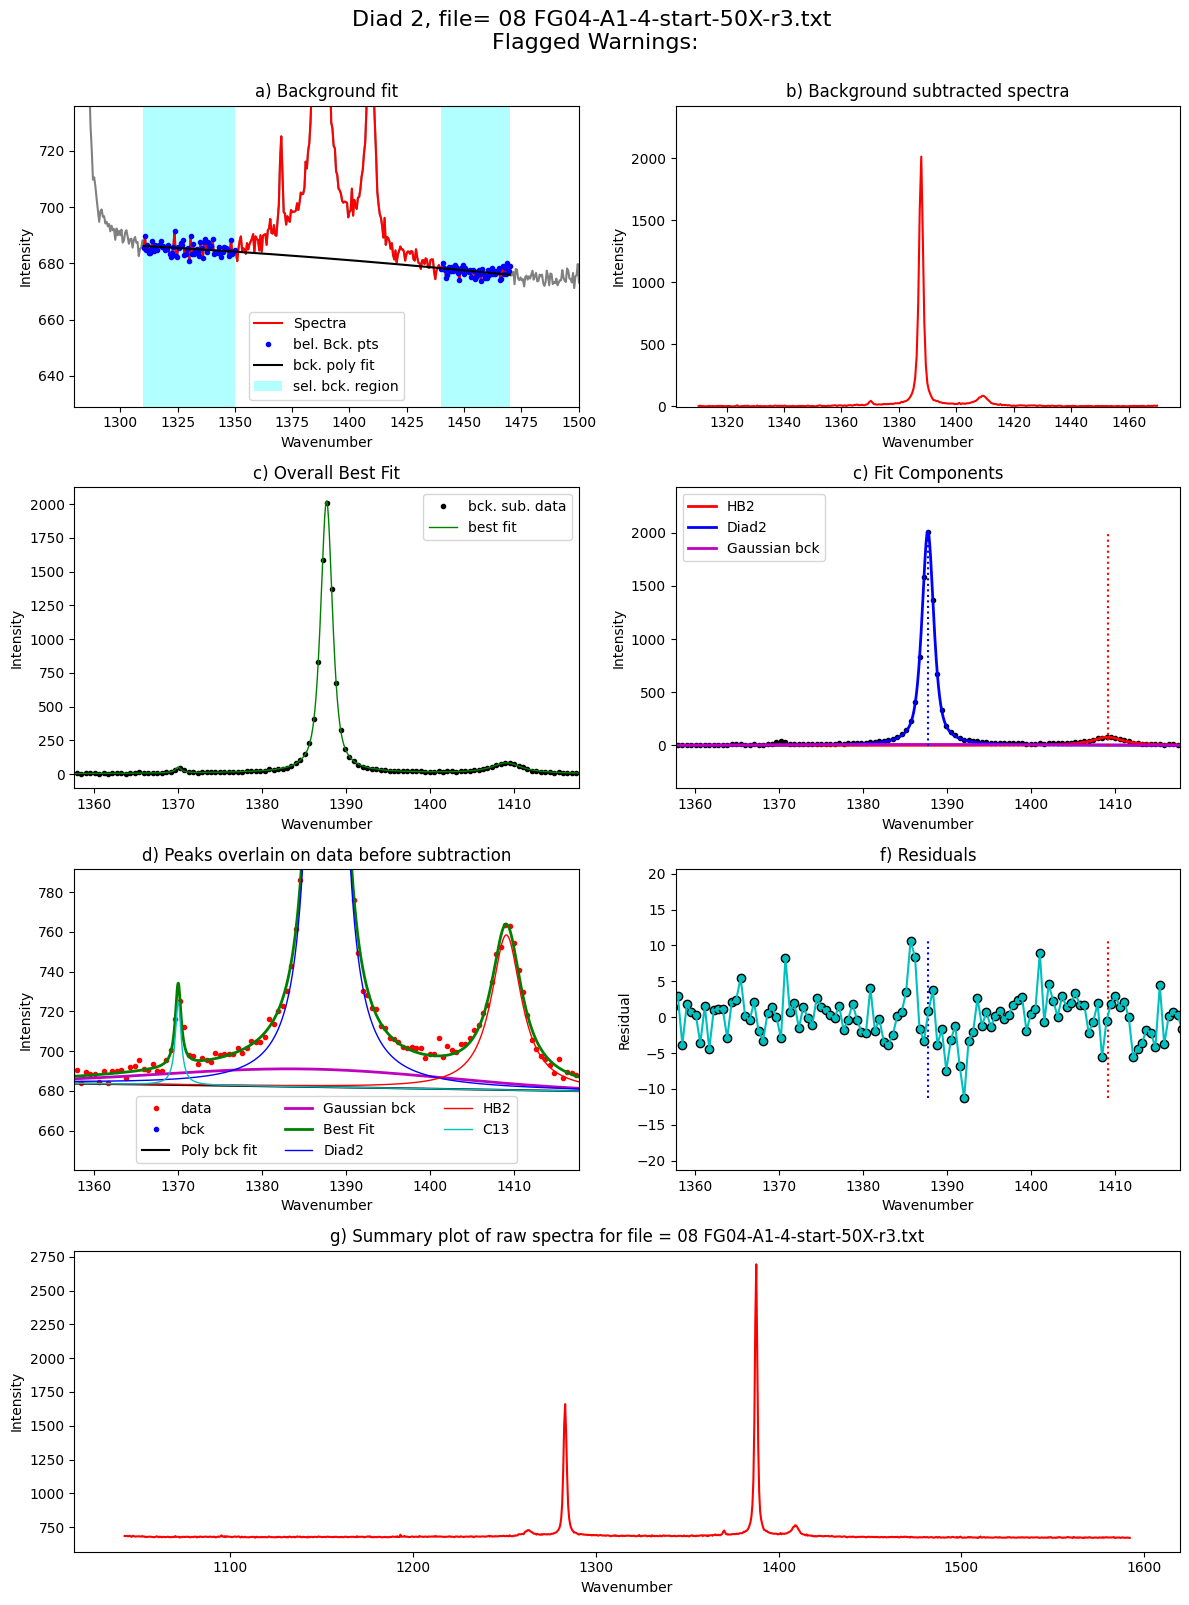

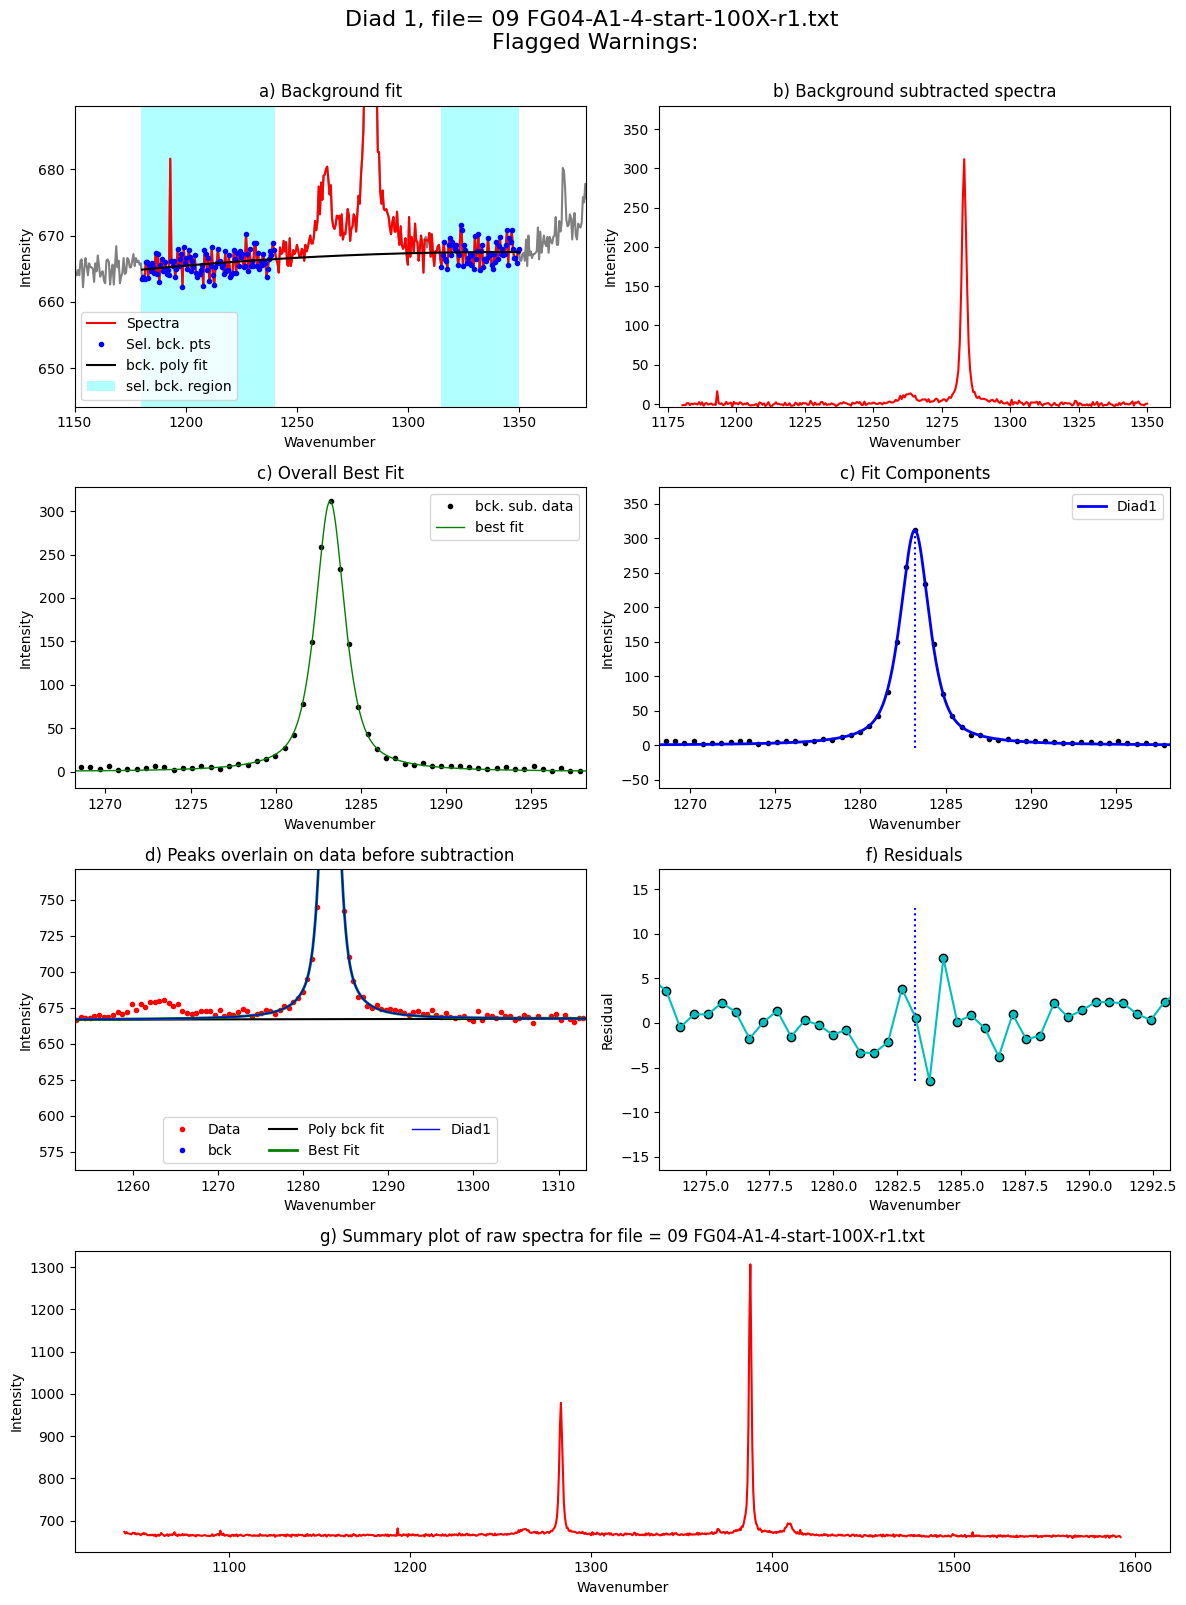

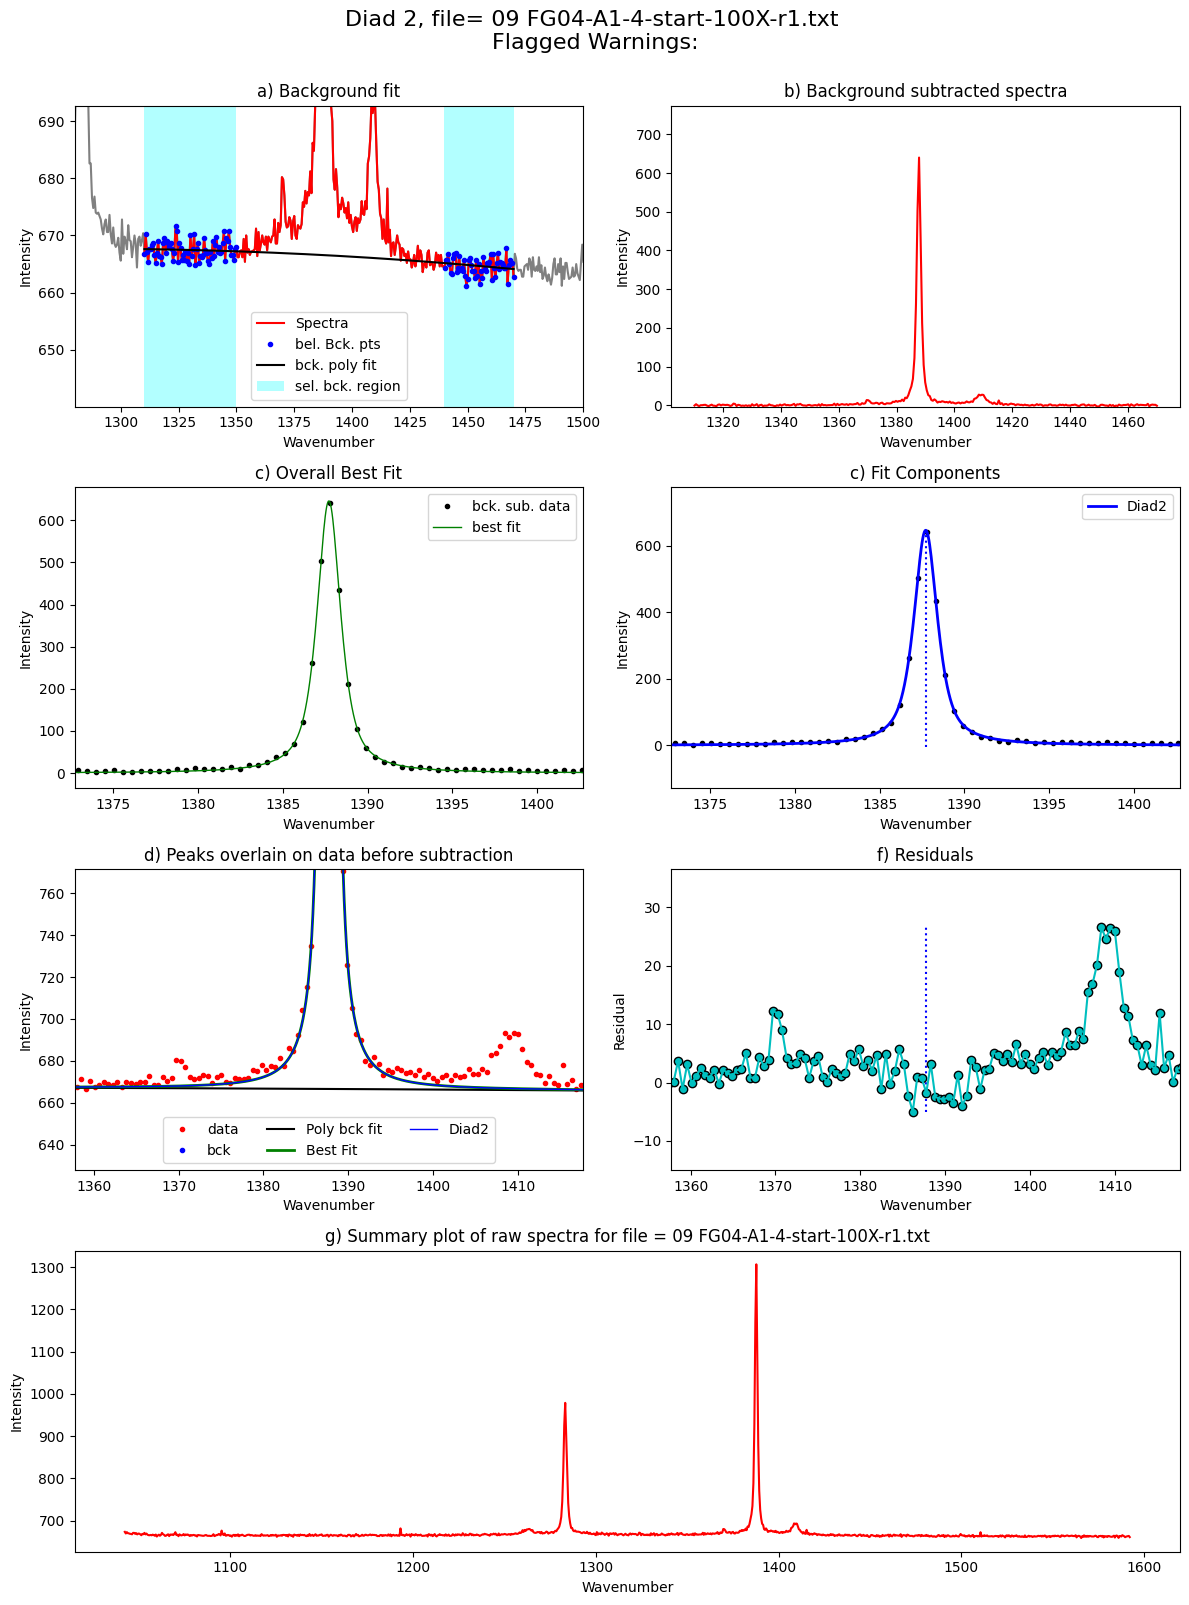

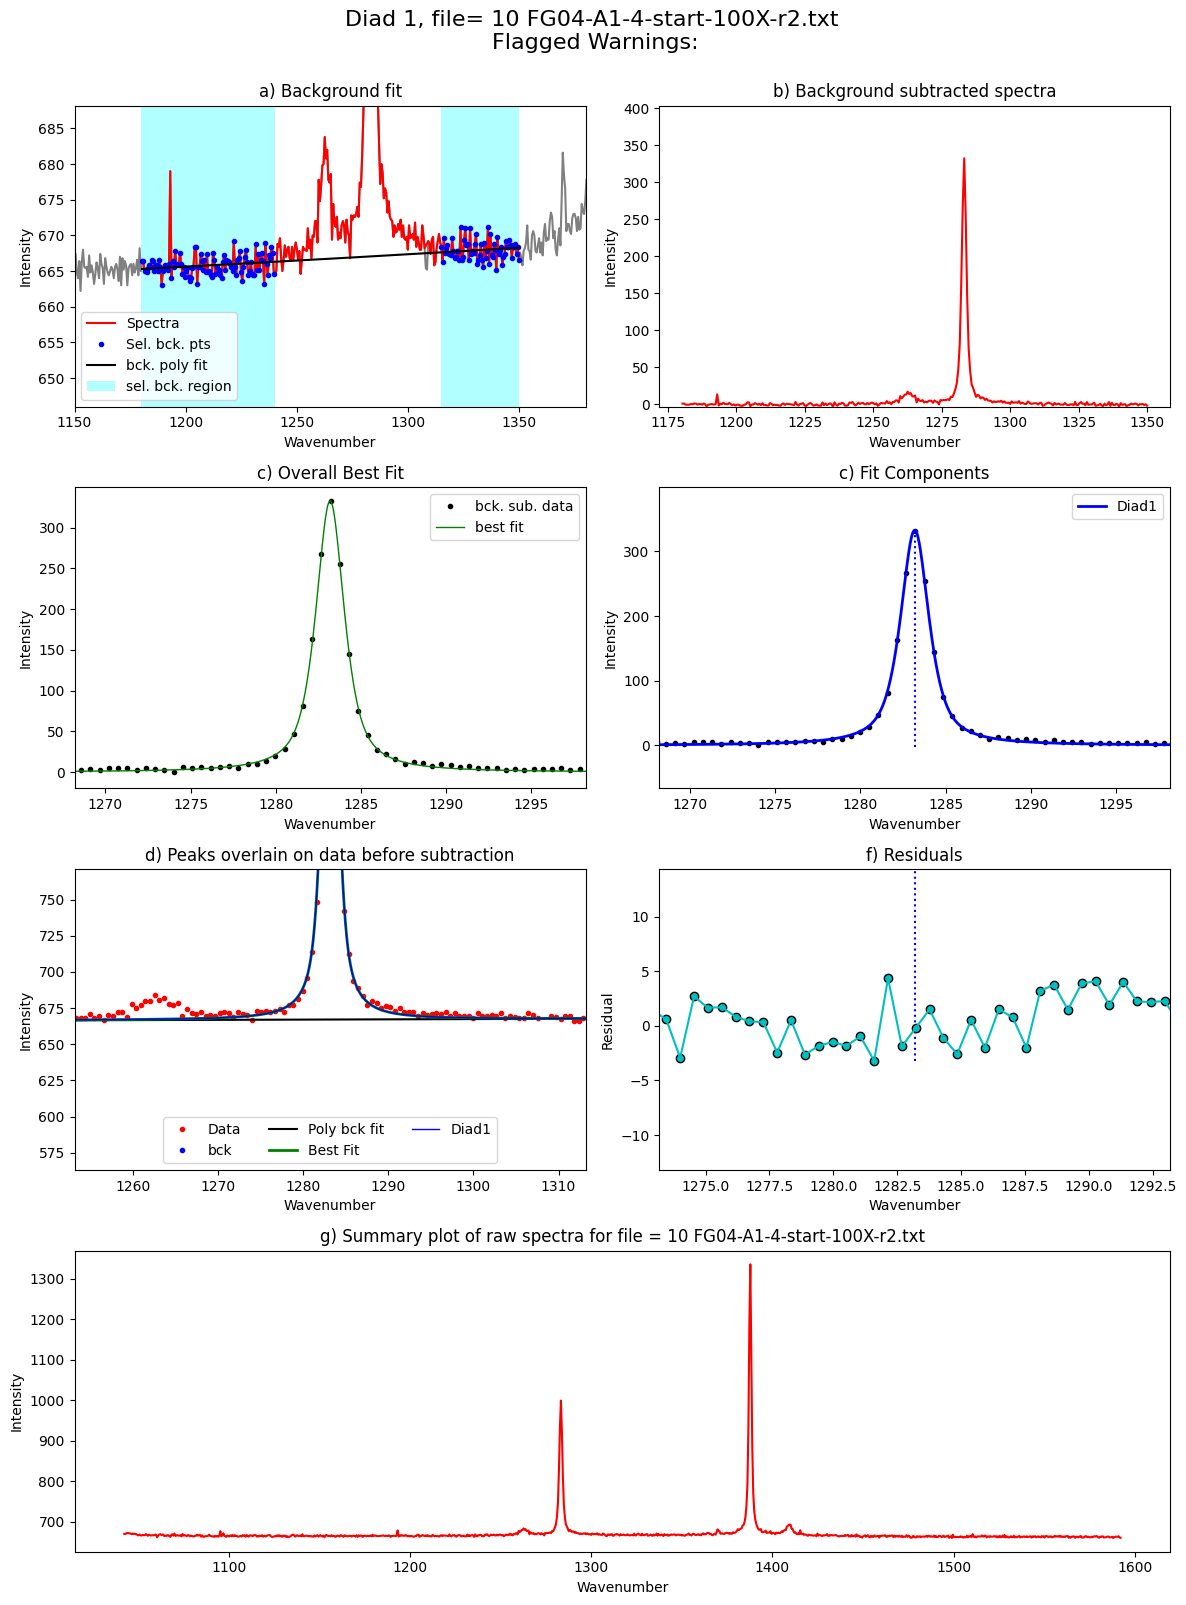

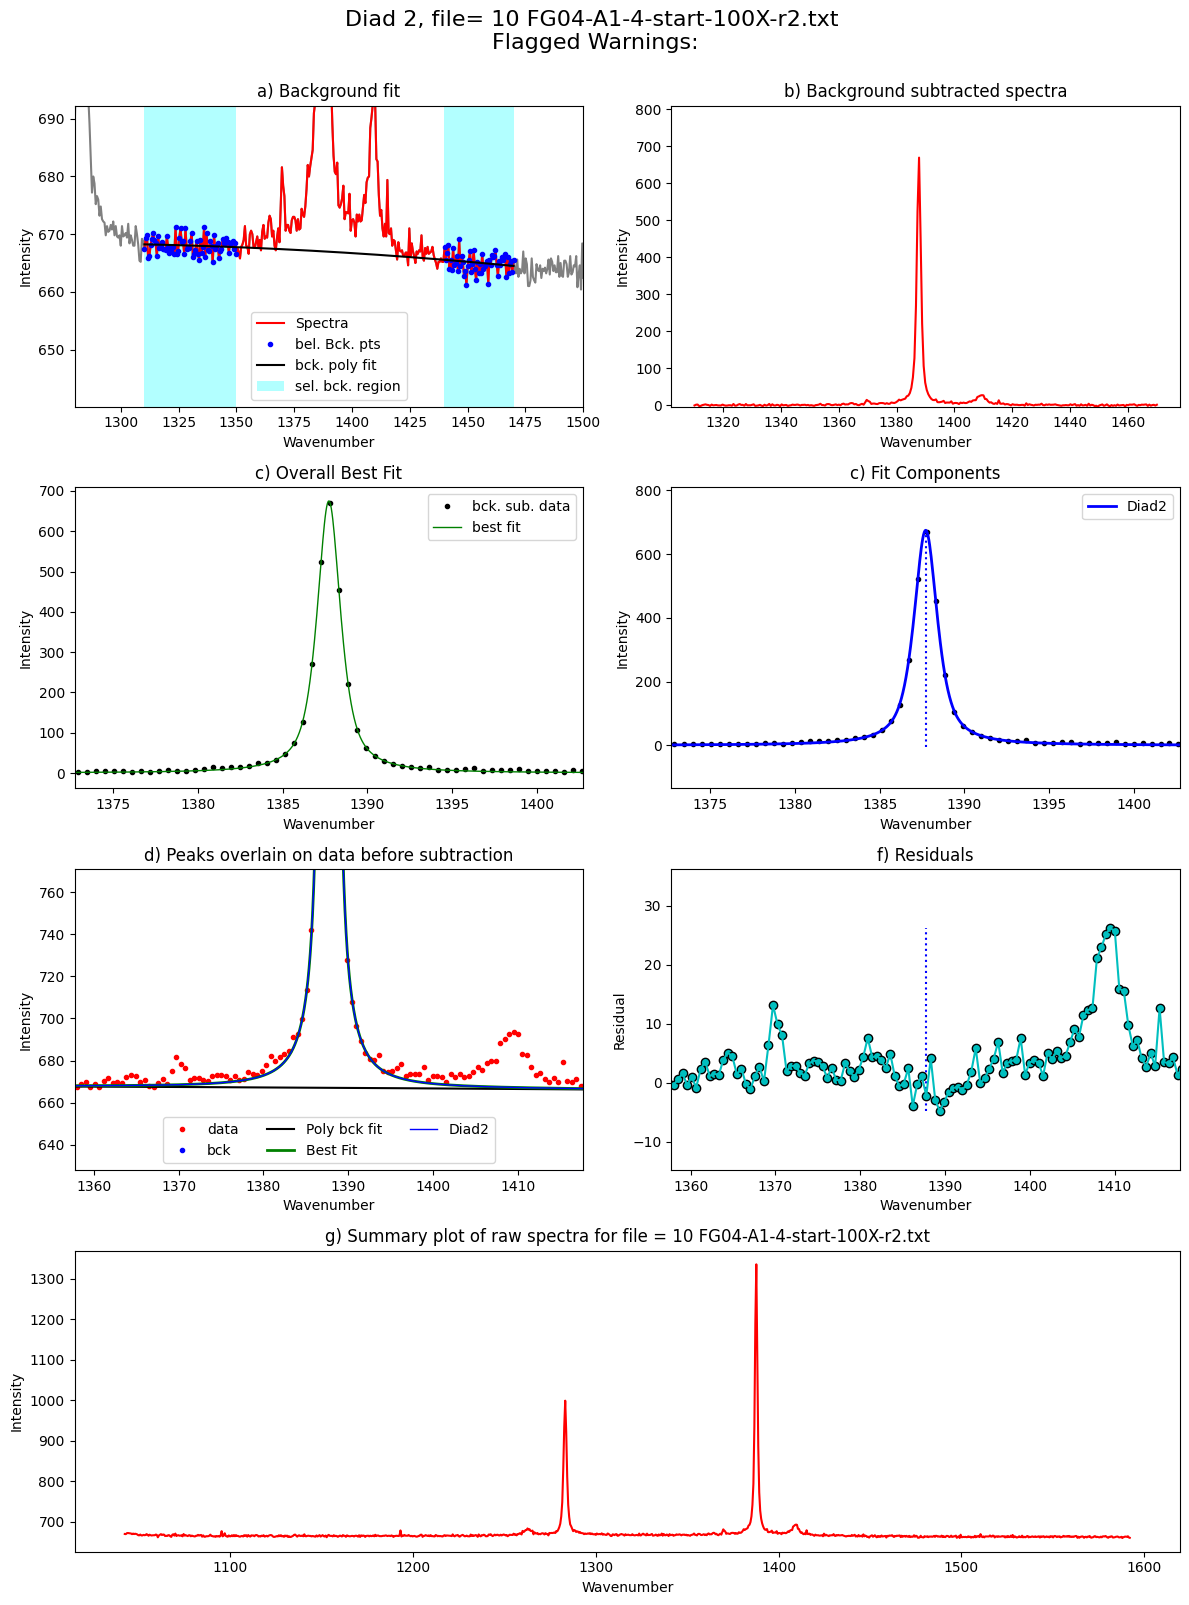

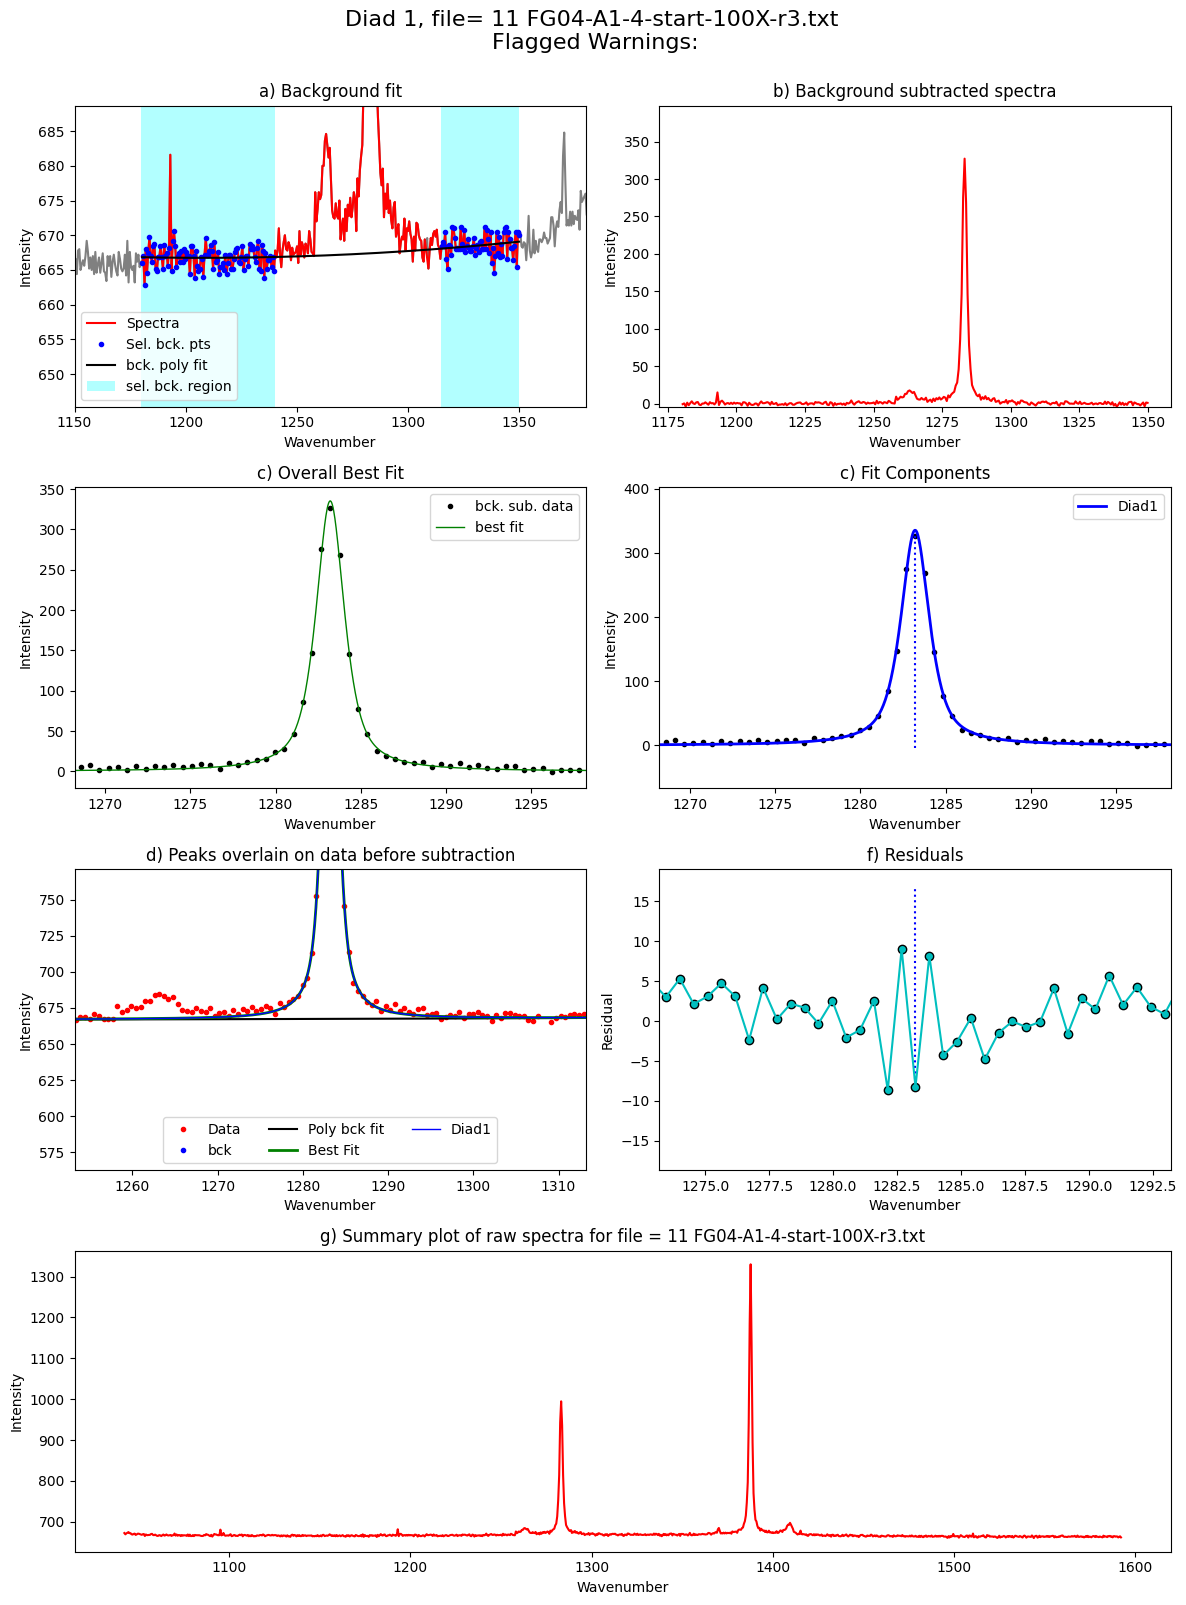

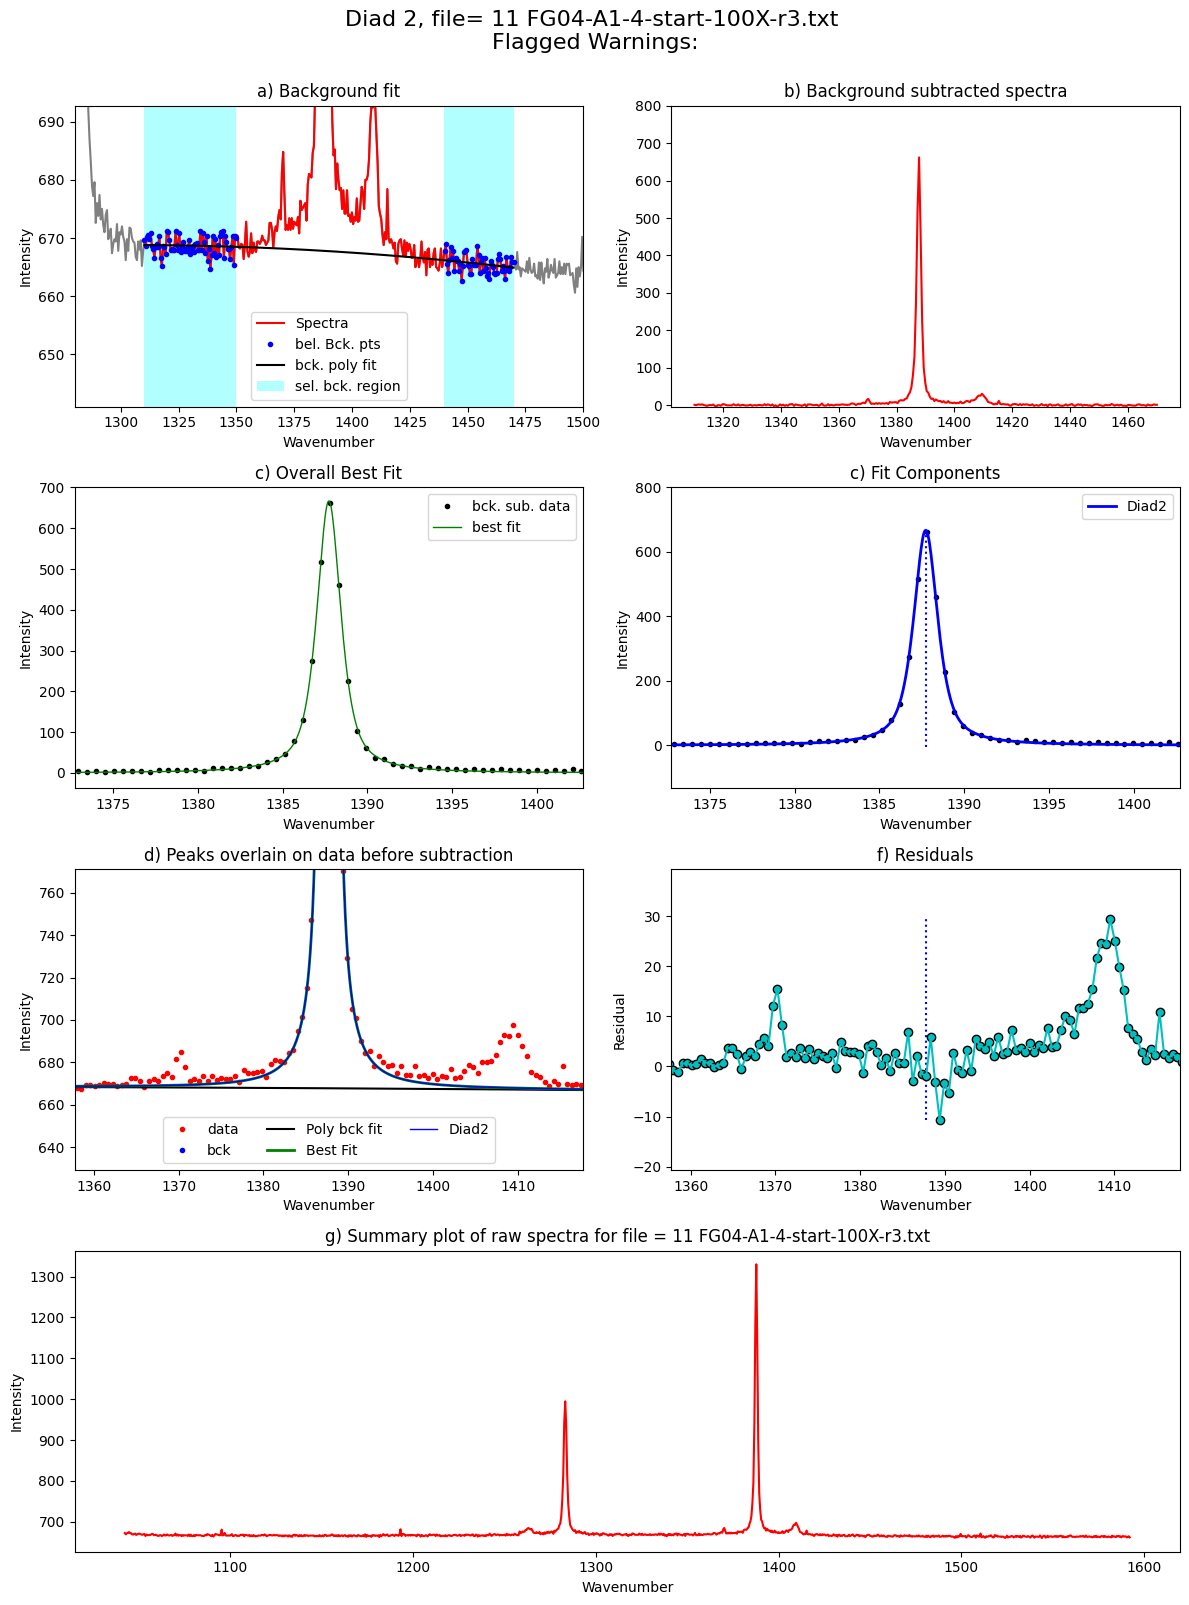

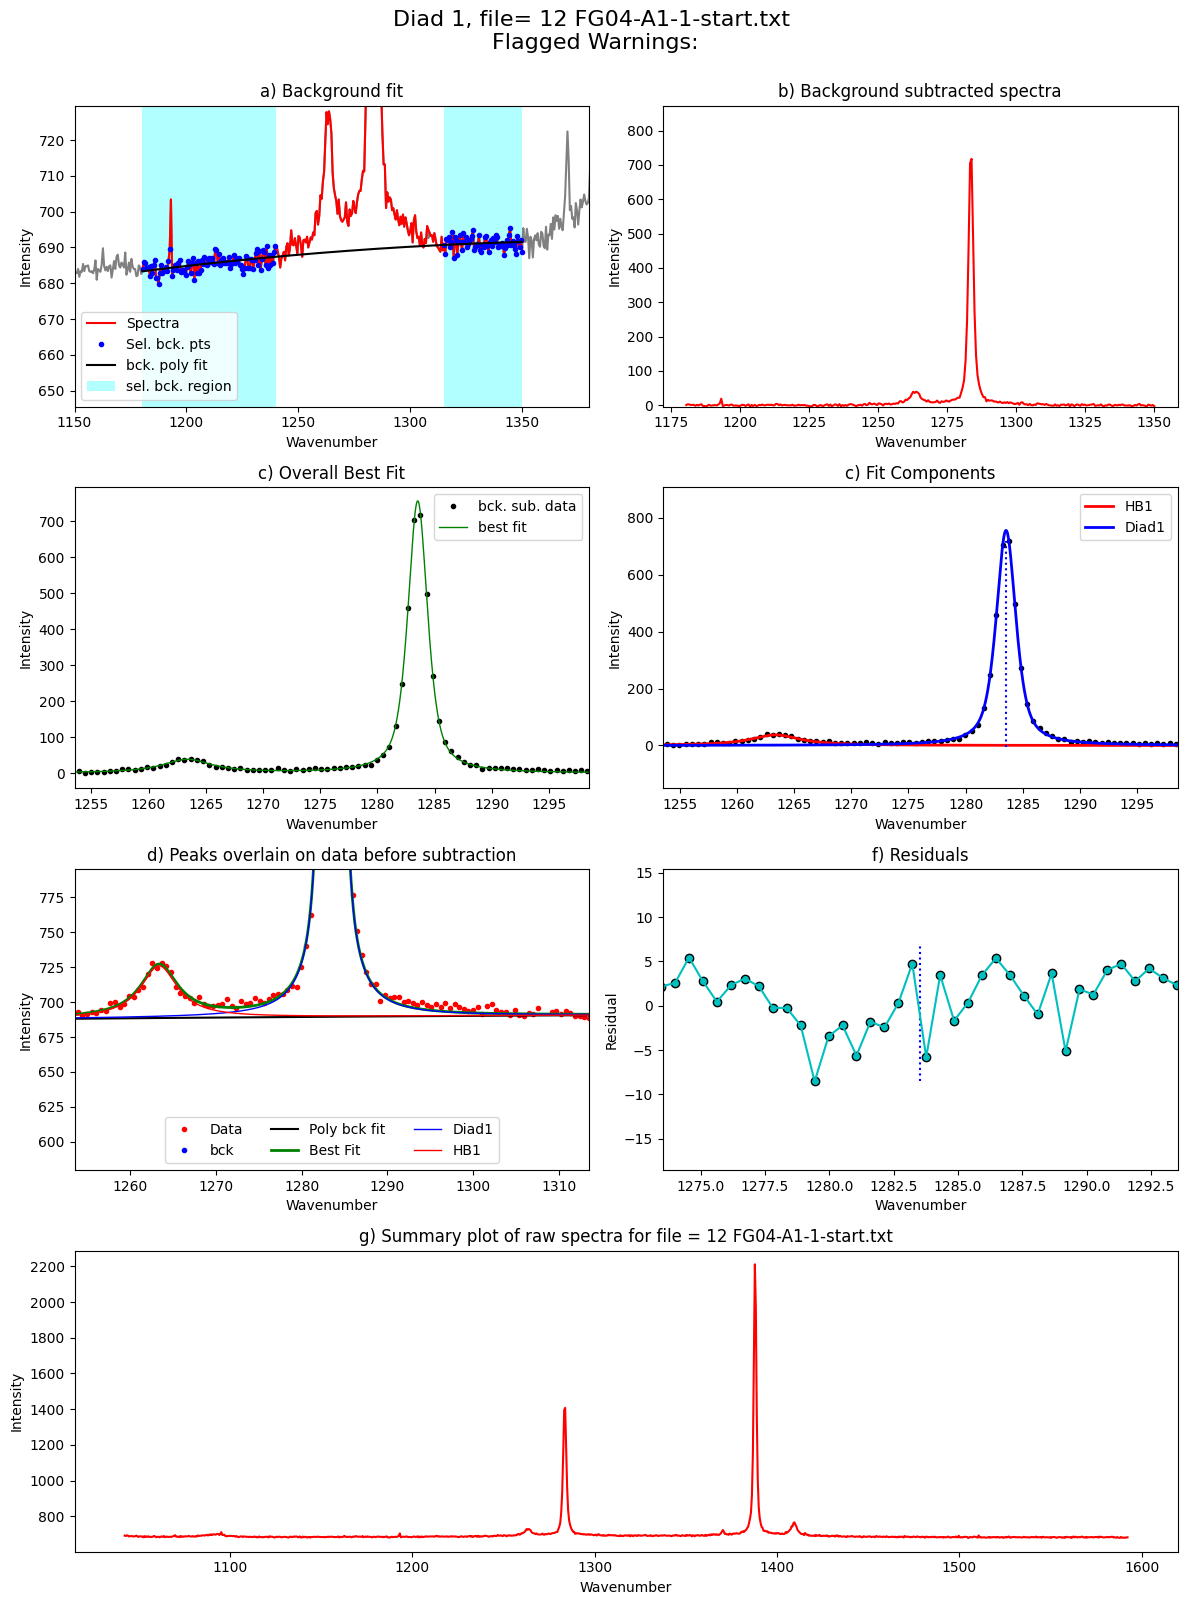

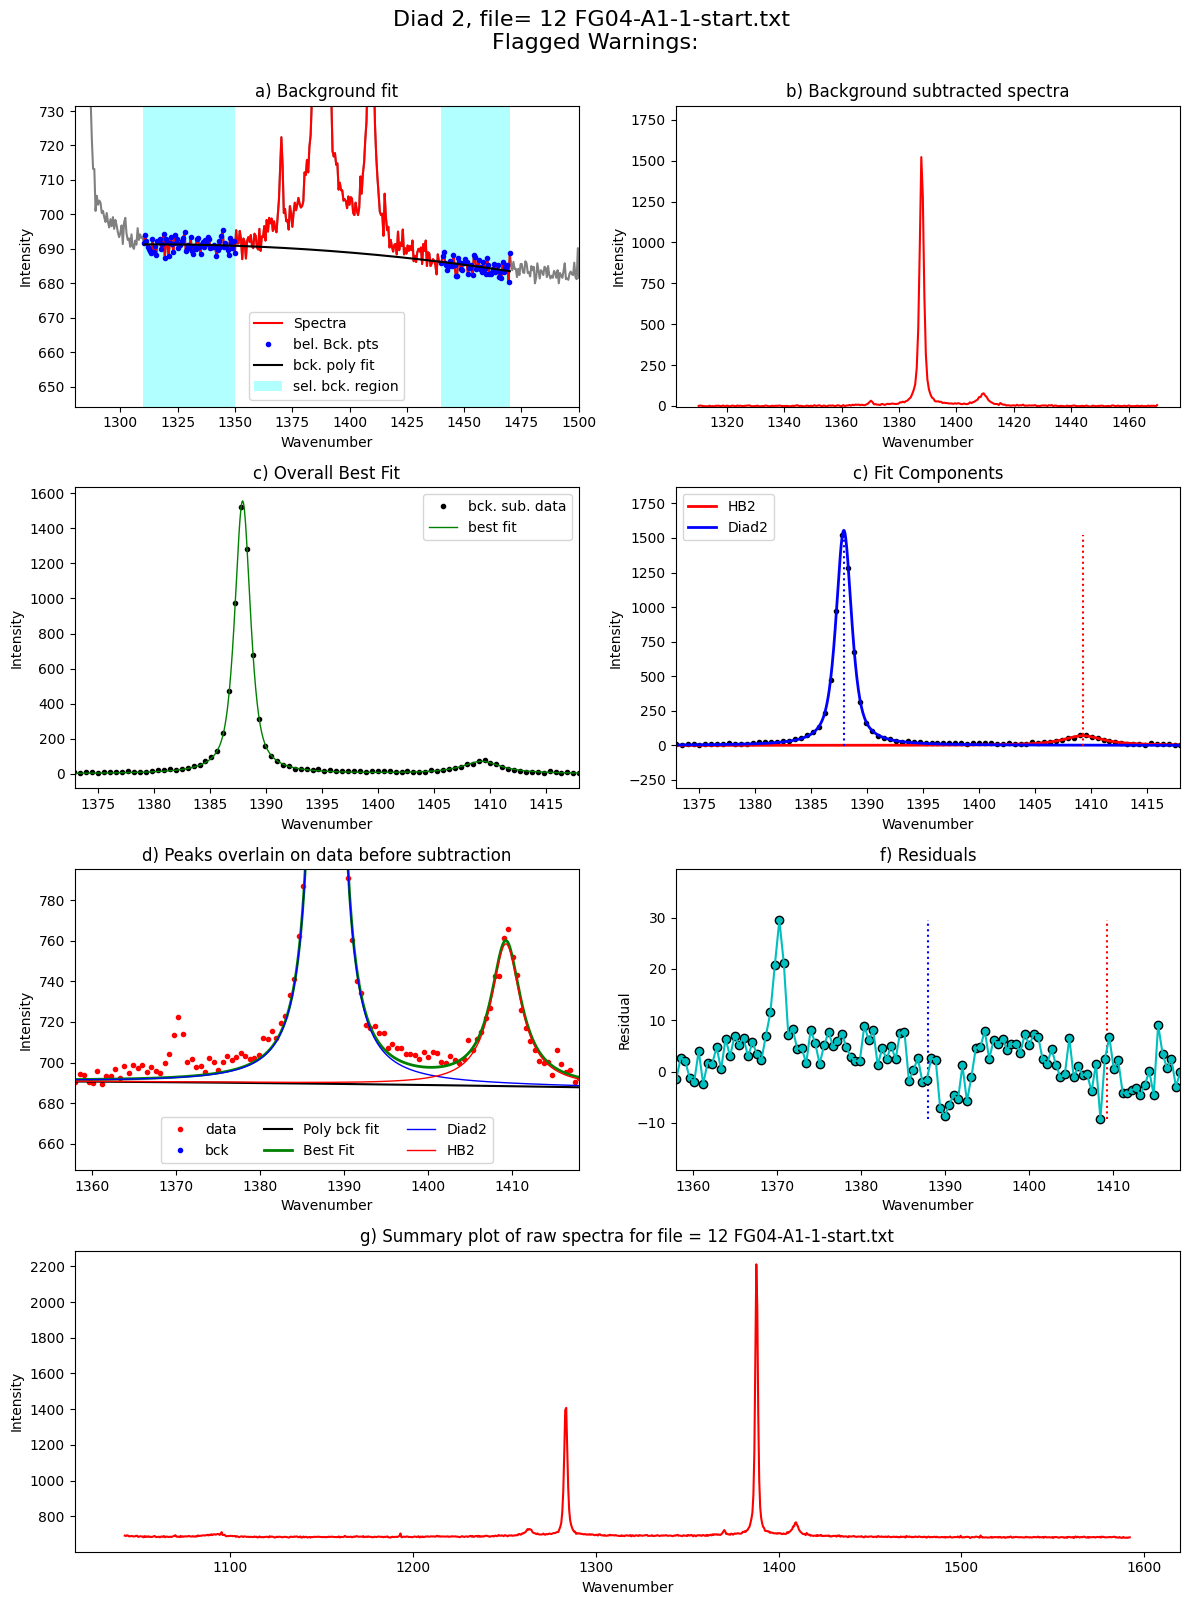

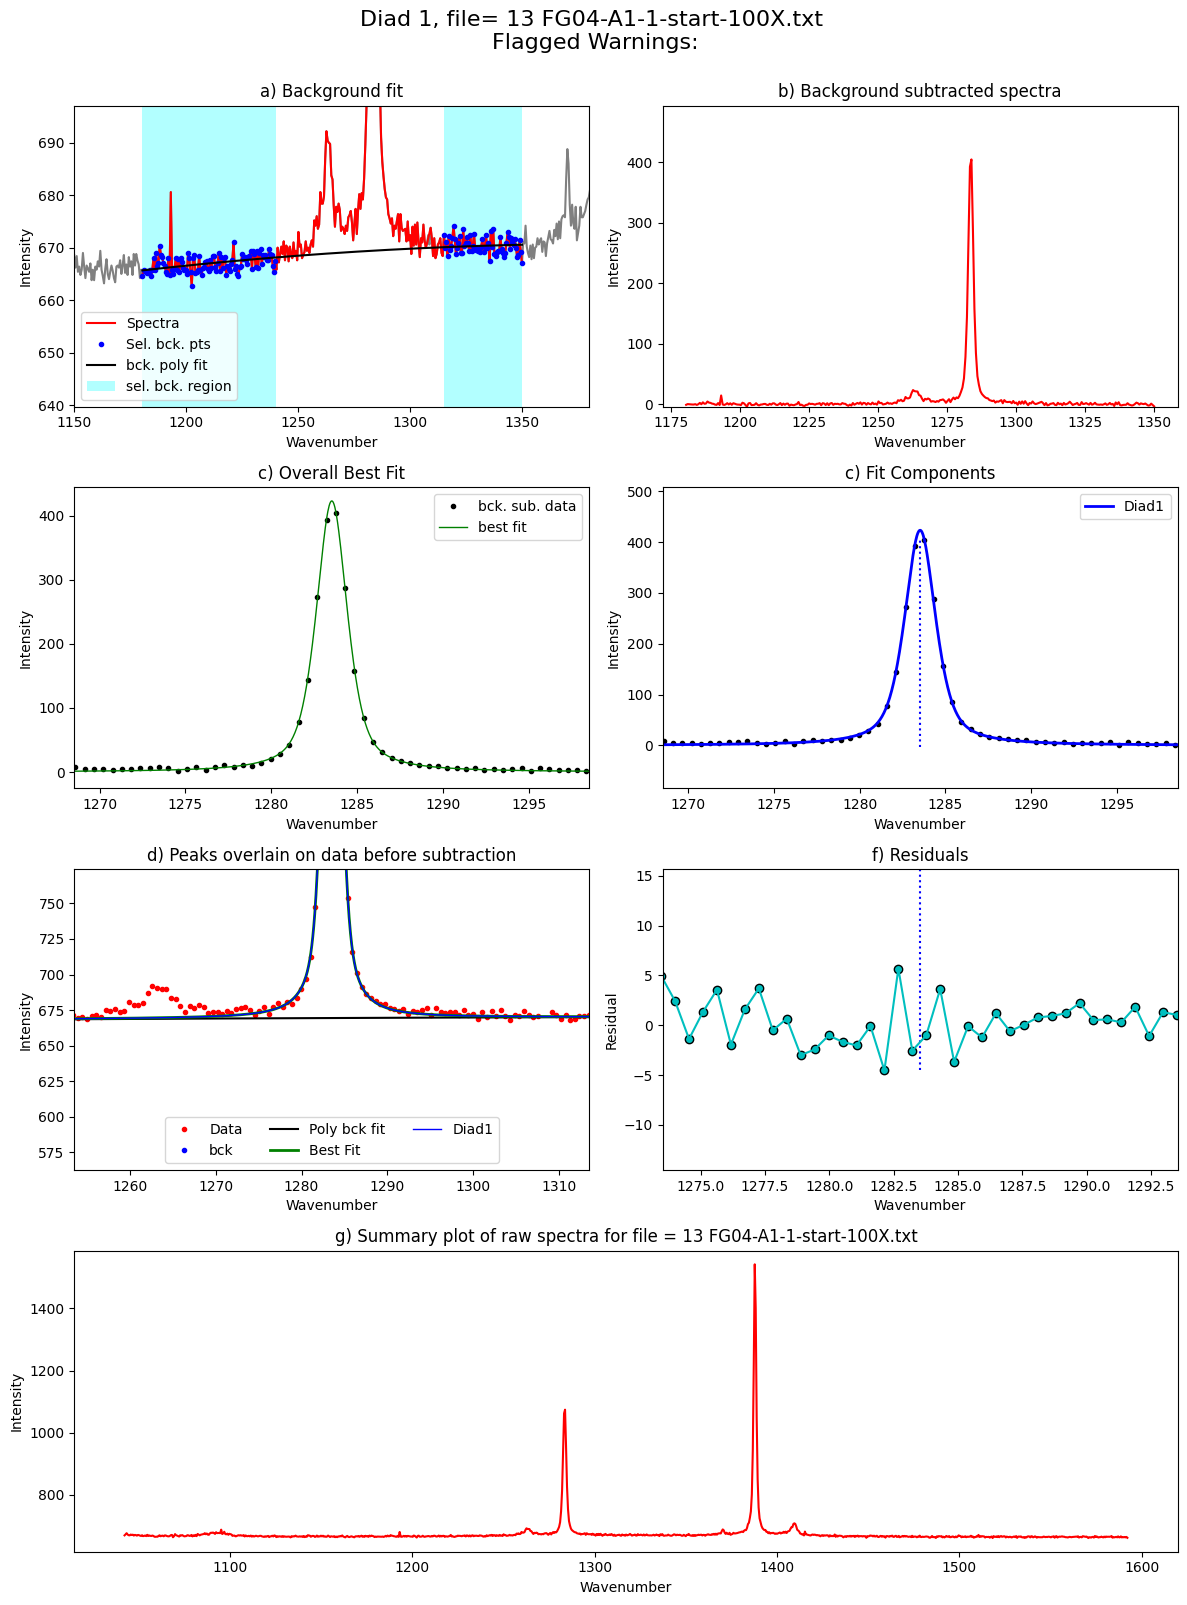

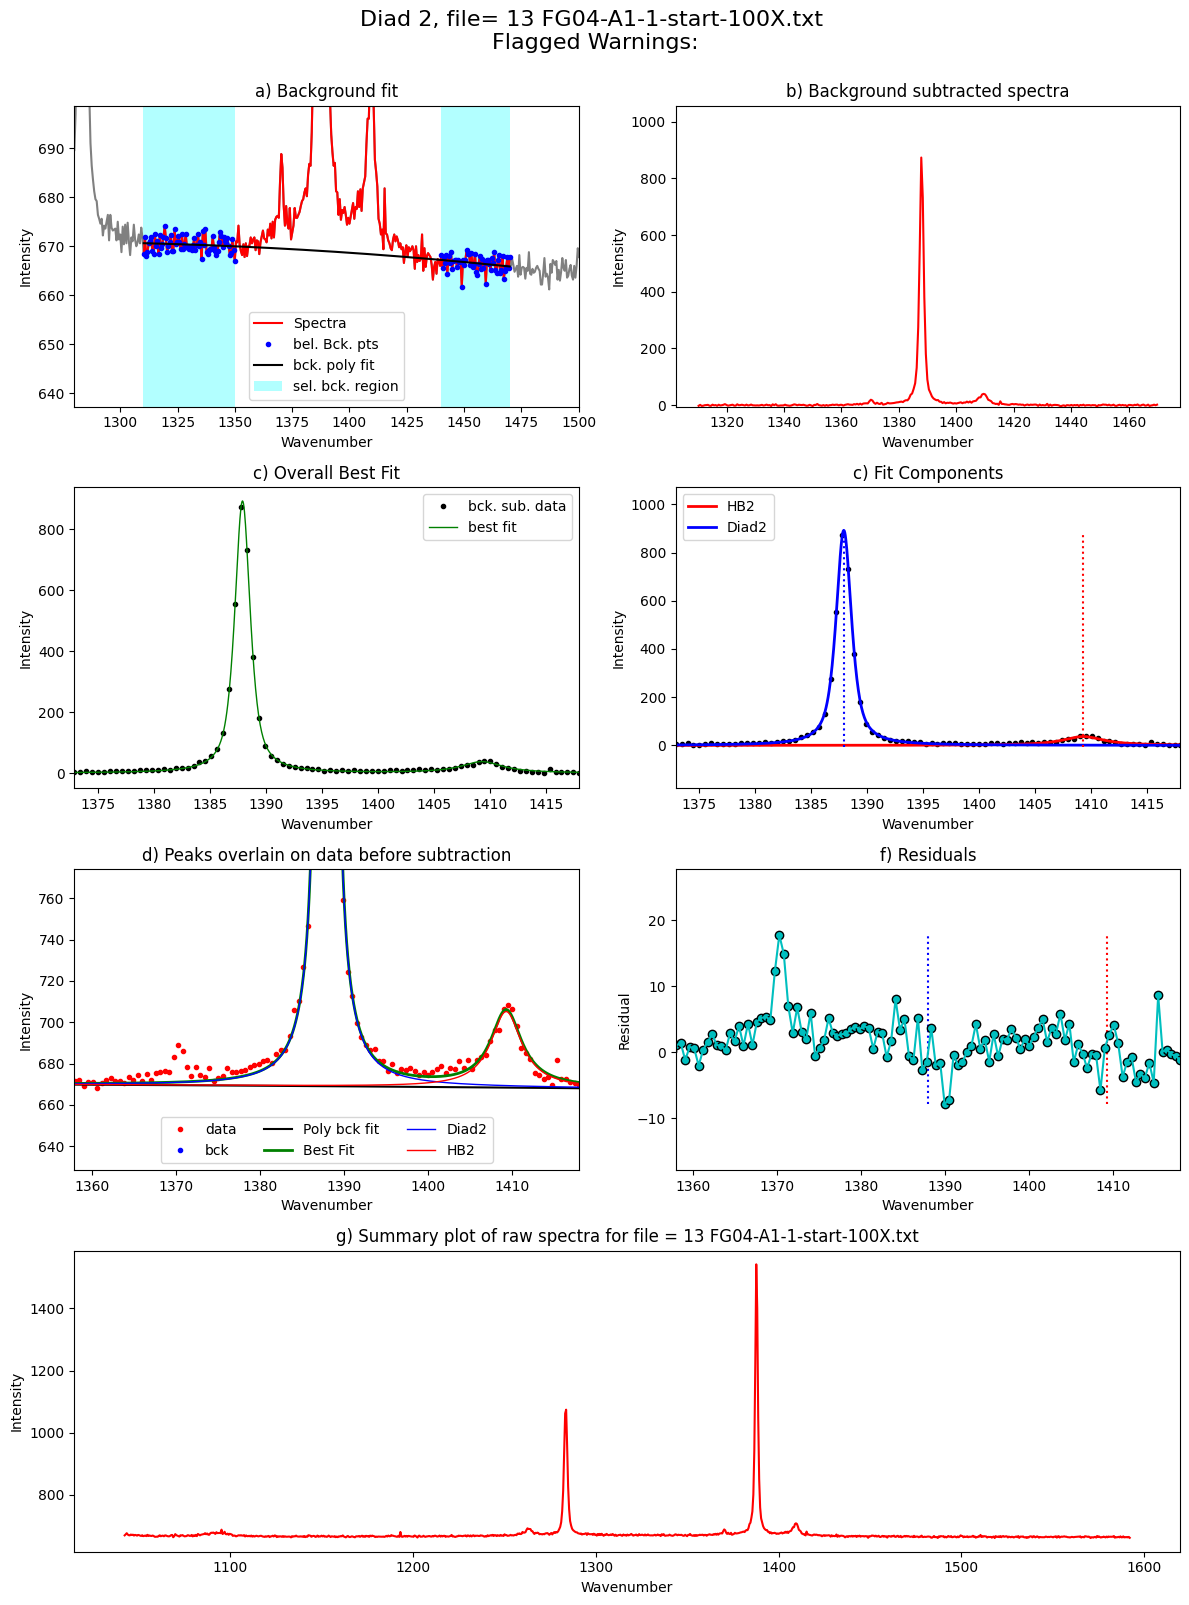

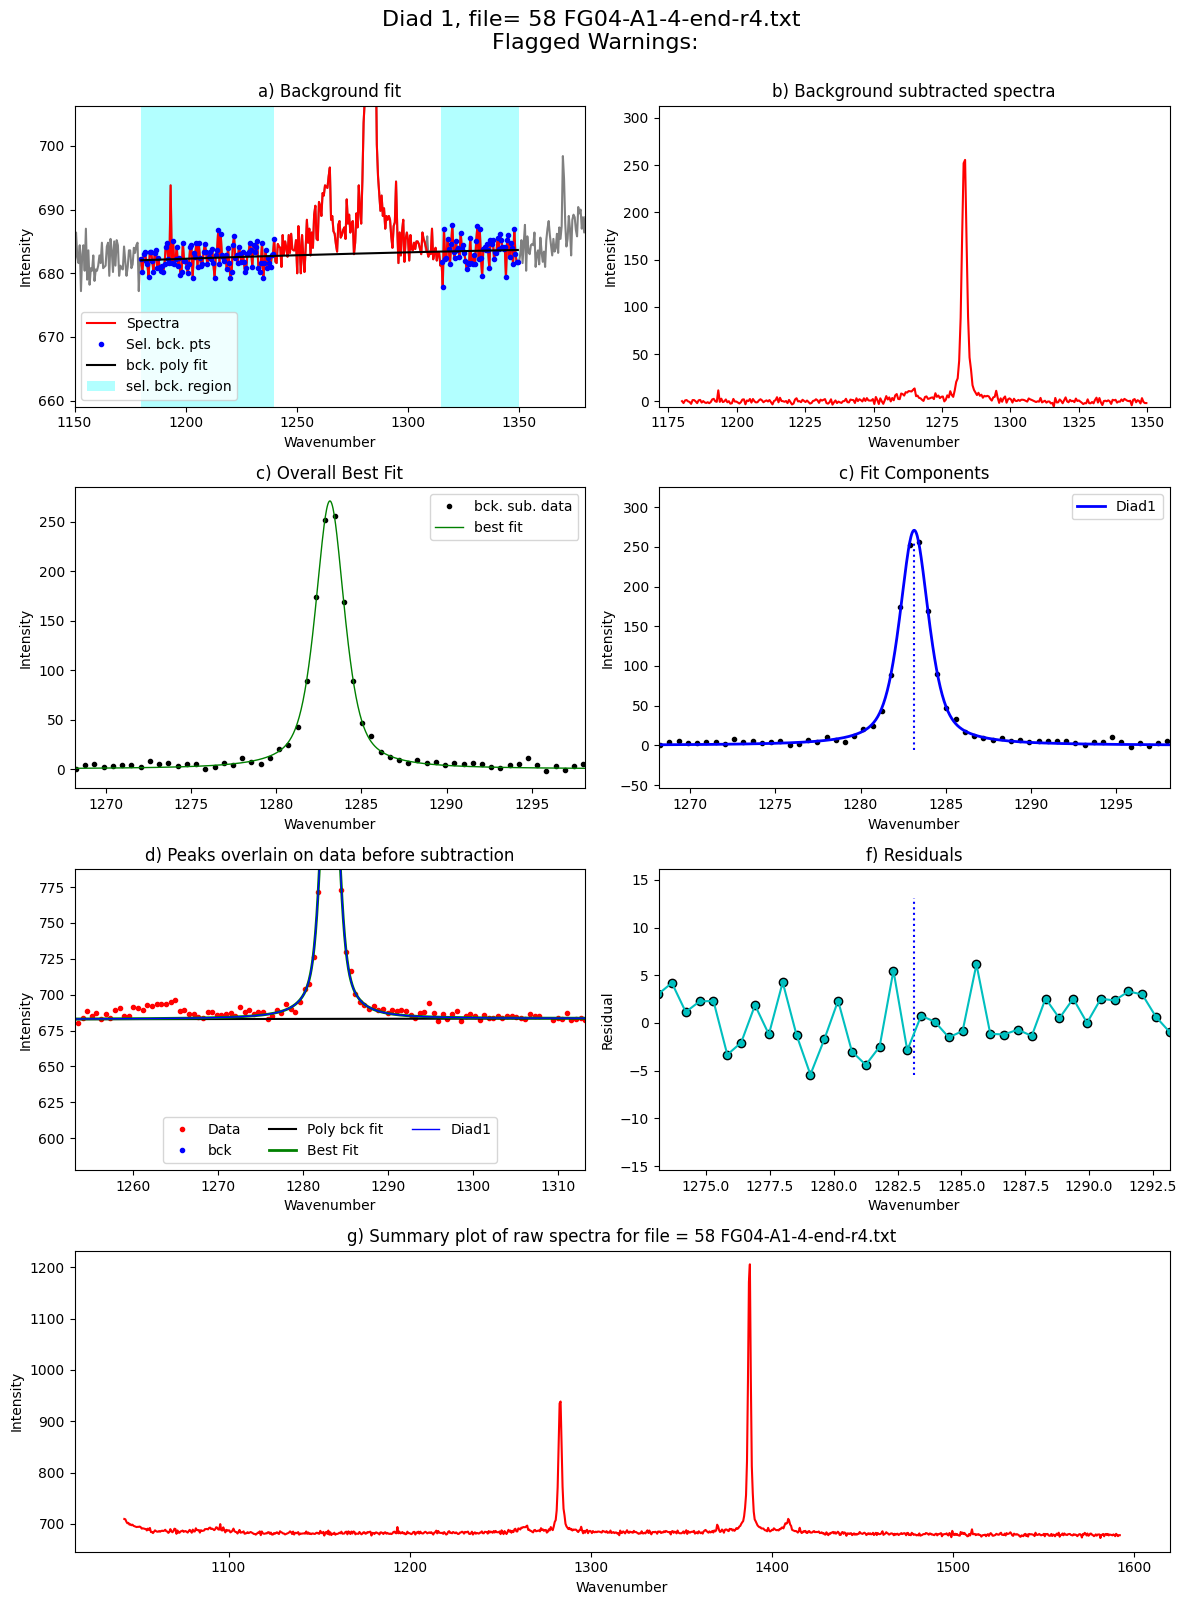

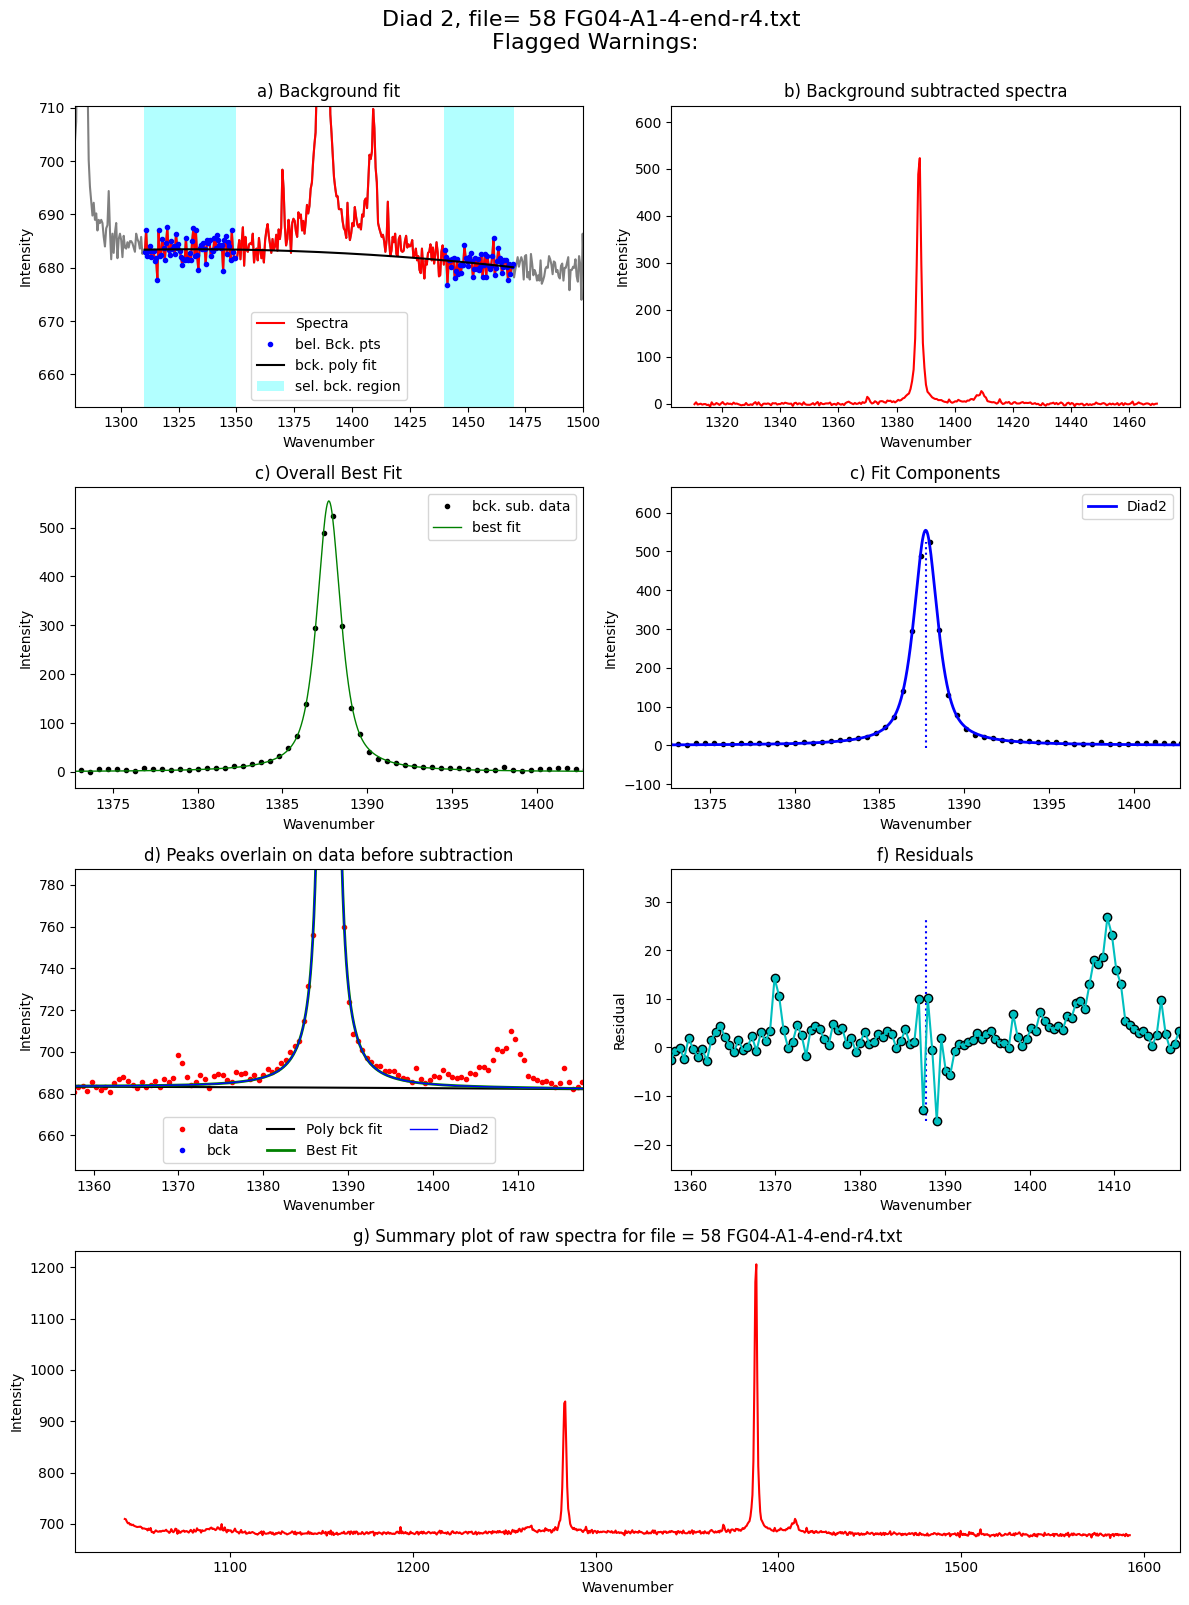

In [42]:
from tqdm import tqdm
plot_figure=True# If False, Means doesnt have to make figures, lot faster. 
close_figure=False # If True, wont show figures in notebook, but will still save them in a folder 
Diad_Files_i=Diad_Files
df_Merge = pd.DataFrame([])
for i in tqdm(range(0, len(Diad_Files))): #
    tqdm.write(f"Processing file: {Diad_Files[i]}")
    
    
    # For diad1, config file like you had in the previous. 
    # Only really used to exclude a range (say your spectra has a known spec)
    diad_id_config=pf.diad_id_config(exclude_range1=[1308, 1309])
    
    # Here, the prominence are taken from the fitting in the last notebook
    diad1_fit_config2.HB_prom=GroupN_df['HB1_abs_prom'].iloc[i]
    diad1_fit_config2.diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i]
    diad1_fit_config2.gauss_amp=2*GroupN_df['HB1_abs_prom'].iloc[i]

    Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config2,
    config2=diad_id_config, path=spectra_path, filename=GroupN_df['filename'].iloc[i],
    filetype=spectra_filetype, plot_figure=plot_figure, close_figure=close_figure,
    Diad_pos=GroupN_df['Diad1_pos'].iloc[i],
    HB_pos=GroupN_df['HB1_pos'].iloc[i])

    ## Same for diad2, just also has a C13 peak
    diad2_fit_config_init.HB_prom=GroupN_df['HB2_abs_prom'].iloc[i]
    diad2_fit_config_init.diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i]
    diad2_fit_config_init.gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i]
    diad2_fit_config_init.C13_prom=GroupN_df['C13_abs_prom'].iloc[i]
    
    
    Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config_init,
        config2=diad_id_config,
    path=spectra_path, filename=GroupN_df['filename'].iloc[i], 
    filetype=spectra_filetype,
    plot_figure=plot_figure, close_figure=close_figure,
    Diad_pos=GroupN_df['Diad2_pos'].iloc[i],
    HB_pos=GroupN_df['HB2_pos'].iloc[i], 
    C13_pos=GroupN_df['C13_pos'].iloc[i])
    
    # This combines the outputs into a single dataframe
    data=pf.combine_diad_outputs(filename=GroupN_df['filename'].iloc[i], prefix=prefix, 
    Diad1_fit=Diad1_fit, path=spectra_path,                  
    Diad2_fit=Diad2_fit)        
    
 

    df_Merge = pd.concat([df_Merge, data], axis=0).reset_index(drop=True)


In [43]:
# Save parameters to excel
combo=df_Merge

if batch=='Weak':
    combo.to_excel('Weak_Diads.xlsx', index=False)
if batch=='Medium':
    combo.to_excel('Medium_Diads.xlsx', index=False)
if batch=='Strong':
    combo.to_excel('Strong_Diads.xlsx', index=False)
if batch=='Std':
    combo.to_excel('Std_Diads.xlsx', index=False)

In [44]:
combo

filename   Splitting   Split_σ  Diad1_Combofit_Cent  \
0   FG04-A1-4-start-50X-r1  104.530675  0.008236          1283.180918   
1   FG04-A1-4-start-50X-r2  104.534787  0.002887          1283.167015   
2   FG04-A1-4-start-50X-r3  104.527928  0.002661          1283.189134   
3  FG04-A1-4-start-100X-r1  104.531532  0.009253          1283.186892   
4  FG04-A1-4-start-100X-r2  104.534261  0.008680          1283.186091   
5  FG04-A1-4-start-100X-r3  104.517562  0.009785          1283.209534   
6          FG04-A1-1-start  104.382765  0.003369          1283.532734   
7     FG04-A1-1-start-100X  104.384896  0.007685          1283.527549   
8         FG04-A1-4-end-r4  104.585270  0.010210          1283.151043   

   Diad1_cent_err  Diad1_Combofit_Height  Diad1_Voigt_Cent  Diad1_Voigt_Area  \
0        0.007877             482.962278       1283.180918       1411.598827   
1        0.002706             947.641761       1283.167065       2692.254055   
2        0.002499             986.379350       1283.189184       2813.250178   
3        0.007568             311.437457       1283.186892        902.090990   
4        0.007162             332.769614       1283.186091        954.915287   
5        0.008222             335.502827       1283.209534        960.869938   
6        0.002772             756.683570       1283.532784       2174.107023   
7        0.007340             423.189201       1283.527549       1244.696915   
8        0.008522             270.823838       1283.151043        763.209071   

   Diad1_Voigt_Sigma  Diad1_Residual  ...  Diad1_Asym50  Diad1_Asym70  \
0           1.019119        4.214528  ...      1.008306      1.026995   
1           1.003097        3.197517  ...      1.006723      1.010740   
2           1.022539        2.935454  ...      1.043478      1.043114   
3           1.022590        2.541839  ...      1.089041      1.069461   
4           1.001924        2.679633  ...      1.065517      1.037440   
5           0.999132        3.150670  ...      1.052265      1.001188   
6           1.029733        2.358492  ...      1.039867      1.022119   
7           1.076062        3.233041  ...      1.044444      1.019296   
8           1.017474        2.696908  ...      1.085034      1.030012   

  Diad1_Yuan2017_sym_factor  Diad1_Remigi2021_BSF  Diad2_Asym50  Diad2_Asym70  \
0                  0.016929              0.004220      1.095041      1.084892   
1                  0.013487              0.002117      1.065708      1.059163   
2                  0.088916              0.002073      1.055328      1.038462   
3                  0.182105              0.006567      1.061983      1.037356   
4                  0.131287              0.006022      1.055901      1.036179   
5                  0.104439              0.005956      1.056566      1.051502   
6                  0.082105              0.002722      1.077083      1.034384   
7                  0.095650              0.005085      1.060669      1.015647   
8                  0.173040              0.007514      1.213508      1.189815   

   Diad2_Yuan2017_sym_factor  Diad2_Remigi2021_BSF   Diad1_PDF_Model  \
0                   0.161108              0.001734  PseudoVoigtModel   
1                   0.110530              0.000885  PseudoVoigtModel   
2                   0.092957              0.000830  PseudoVoigtModel   
3                   0.103188              0.002576  PseudoVoigtModel   
4                   0.092545              0.002452  PseudoVoigtModel   
5                   0.095794              0.002539  PseudoVoigtModel   
6                   0.128301              0.001070  PseudoVoigtModel   
7                   0.100104              0.001849  PseudoVoigtModel   
8                   0.356840              0.003013  PseudoVoigtModel   

    Diad2_PDF_Model  
0  PseudoVoigtModel  
1  PseudoVoigtModel  
2  PseudoVoigtModel  
3  PseudoVoigtModel  
4  PseudoVoigtModel  
5  PseudoVoigtModel  
6  PseudoVoigtModel  
7  PseudoVoigtModel  
8  PseudoVoigtModel  

[9

### This plays a sound when the notebook is done if you have a tendency to procrastinate

In [45]:
import os

if os.name=="posix":

    def mac_notification(title, subtitle, message):
        """
        Display a macOS notification with the default sound using AppleScript.
        
        Args:
        - title: Title of the notification.
        - subtitle: Subtitle of the notification.
        - message: Main message content of the notification.
        """
        os.system("""
                osascript -e 'display notification "{}" with title "{}" subtitle "{}" sound name "default"'
                """.format(message, title, subtitle))

    mac_notification("Notebook Completed", "VSCode", "Step3 Fit All")

else:

    # %pip install winotify

    from winotify import Notification, audio

    toast= Notification(app_id="VSCode",title="Notebook completed",
                        msg="Step3 Fitall is done!",
                        duration="short")
    toast.set_audio(audio.Mail,loop=False)
    toast.show()